In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import researchpy as rp

In [3]:
#Data Loading + Cleaning
df = pd.read_csv('lung cancer survey.csv')
df.isna().sum()
df = df.dropna()
df.count()

#Basic Data Exploration
df.head(5)
df.describe()
#Describe shows the following details:
#1. Gender, Smoking, Alcohol Consuming, Allergy are all roughly evenly split
#2. Chest pain / Fatigue / Shortness of Breath seems to have higher prevalence as symptoms compared to the others
#3. 80% of the dataset has lung cancer [Have to split the data by that and analyse the individual components T score test to see if it results in any differences]

GENDER                   99
AGE                      99
SMOKING                  99
YELLOW_FINGERS           99
ANXIETY                  99
PEER_PRESSURE            99
CHRONIC DISEASE          99
FATIGUE                  99
ALLERGY                  99
WHEEZING                 99
ALCOHOL CONSUMING        99
COUGHING                 99
SHORTNESS OF BREATH      99
SWALLOWING DIFFICULTY    99
CHEST PAIN               99
LUNG_CANCER              99
dtype: int64

GENDER                   9001
AGE                      9001
SMOKING                  9001
YELLOW_FINGERS           9001
ANXIETY                  9001
PEER_PRESSURE            9001
CHRONIC DISEASE          9001
FATIGUE                  9001
ALLERGY                  9001
WHEEZING                 9001
ALCOHOL CONSUMING        9001
COUGHING                 9001
SHORTNESS OF BREATH      9001
SWALLOWING DIFFICULTY    9001
CHEST PAIN               9001
LUNG_CANCER              9001
dtype: int64

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,0.536274,60.706588,0.521053,0.527941,0.456283,0.510610,0.465726,0.687701,0.548272,0.490390,0.525164,0.593823,0.698034,0.347961,0.627819,0.805022
std,0.498710,11.342242,0.499584,0.499246,0.498113,0.499915,0.498852,0.463457,0.497692,0.499935,0.499394,0.491146,0.459136,0.476350,0.483413,0.396206
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,61.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Seeing Data Spread
np.bincount(df['AGE'], None, 10)
IndexAge = df[df['AGE'] < 39].index
df.drop(IndexAge, inplace = True)
df.count()
# Creating age category

df['AGE_CATEGORY'] = pd.cut(df["AGE"], bins = [39, 49, 59, 69, float('Inf')], labels = ['40-49', '50-59', '60-69', '70 onwards'])
df['AGE_CATEGORY'].value_counts()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,    0, 2030,  110,  116,   97,  177,  186,  173,  136,  159,
        152,  168,  195,  184,  233,  270,  235,  263,  242,  226,  226,
        201,  260,  218,  260,  209,  167,  185,  155,  140,  148,  150,
       1174,  150,    1,    0,    2], dtype=int64)

GENDER                   9000
AGE                      9000
SMOKING                  9000
YELLOW_FINGERS           9000
ANXIETY                  9000
PEER_PRESSURE            9000
CHRONIC DISEASE          9000
FATIGUE                  9000
ALLERGY                  9000
WHEEZING                 9000
ALCOHOL CONSUMING        9000
COUGHING                 9000
SHORTNESS OF BREATH      9000
SWALLOWING DIFFICULTY    9000
CHEST PAIN               9000
LUNG_CANCER              9000
dtype: int64

AGE_CATEGORY
70 onwards    2481
60-69         2401
40-49         2355
50-59         1763
Name: count, dtype: int64

In [5]:
#Define Risk Factor & Symptoms
risk_factor = ['SMOKING', 'ANXIETY', 'CHRONIC DISEASE', 'ALCOHOL CONSUMING']
symptoms = ['YELLOW_FINGERS', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ALLERGY ']

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4738955823293173, '0.474%')

Text(1.0, 0.5165528113504992, '0.517%')

Text(0.5, 1.0, 'Risk Factor: SMOKING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4598393574297189, '0.460%')

Text(1.0, 0.4908039936941671, '0.491%')

Text(0.5, 1.0, 'Risk Factor: ANXIETY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.45180722891566266, '0.452%')

Text(1.0, 0.4435102469784551, '0.444%')

Text(0.5, 1.0, 'Risk Factor: CHRONIC DISEASE')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2991967871485944, '0.299%')

Text(1.0, 0.5680504466631634, '0.568%')

Text(0.5, 1.0, 'Risk Factor: ALCOHOL CONSUMING')

Text(0.5, 0.95, 'Proportional of Age Group: 60-69 having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.49246231155778897, '0.492%')

Text(1.0, 0.5362457993278925, '0.536%')

Text(0.5, 1.0, 'Risk Factor: SMOKING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4296482412060301, '0.430%')

Text(1.0, 0.4743158905424868, '0.474%')

Text(0.5, 1.0, 'Risk Factor: ANXIETY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.47738693467336685, '0.477%')

Text(1.0, 0.4675948151704273, '0.468%')

Text(0.5, 1.0, 'Risk Factor: CHRONIC DISEASE')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3442211055276382, '0.344%')

Text(1.0, 0.5544887181949112, '0.554%')

Text(0.5, 1.0, 'Risk Factor: ALCOHOL CONSUMING')

Text(0.5, 0.95, 'Proportional of Age Group: 70 onwards having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.47289156626506024, '0.473%')

Text(1.0, 0.5653389238294899, '0.565%')

Text(0.5, 1.0, 'Risk Factor: SMOKING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3855421686746988, '0.386%')

Text(1.0, 0.4276729559748428, '0.428%')

Text(0.5, 1.0, 'Risk Factor: ANXIETY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5030120481927711, '0.503%')

Text(1.0, 0.49615653389238296, '0.496%')

Text(0.5, 1.0, 'Risk Factor: CHRONIC DISEASE')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3644578313253012, '0.364%')

Text(1.0, 0.6275331935709294, '0.628%')

Text(0.5, 1.0, 'Risk Factor: ALCOHOL CONSUMING')

Text(0.5, 0.95, 'Proportional of Age Group: 50-59 having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.40417457305502846, '0.404%')

Text(1.0, 0.5350109409190372, '0.535%')

Text(0.5, 1.0, 'Risk Factor: SMOKING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3984819734345351, '0.398%')

Text(1.0, 0.45678336980306344, '0.457%')

Text(0.5, 1.0, 'Risk Factor: ANXIETY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5180265654648957, '0.518%')

Text(1.0, 0.4420131291028446, '0.442%')

Text(0.5, 1.0, 'Risk Factor: CHRONIC DISEASE')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.27514231499051234, '0.275%')

Text(1.0, 0.5694748358862144, '0.569%')

Text(0.5, 1.0, 'Risk Factor: ALCOHOL CONSUMING')

Text(0.5, 0.95, 'Proportional of Age Group: 40-49 having Risk Factors categoried & Lung Cancer status')

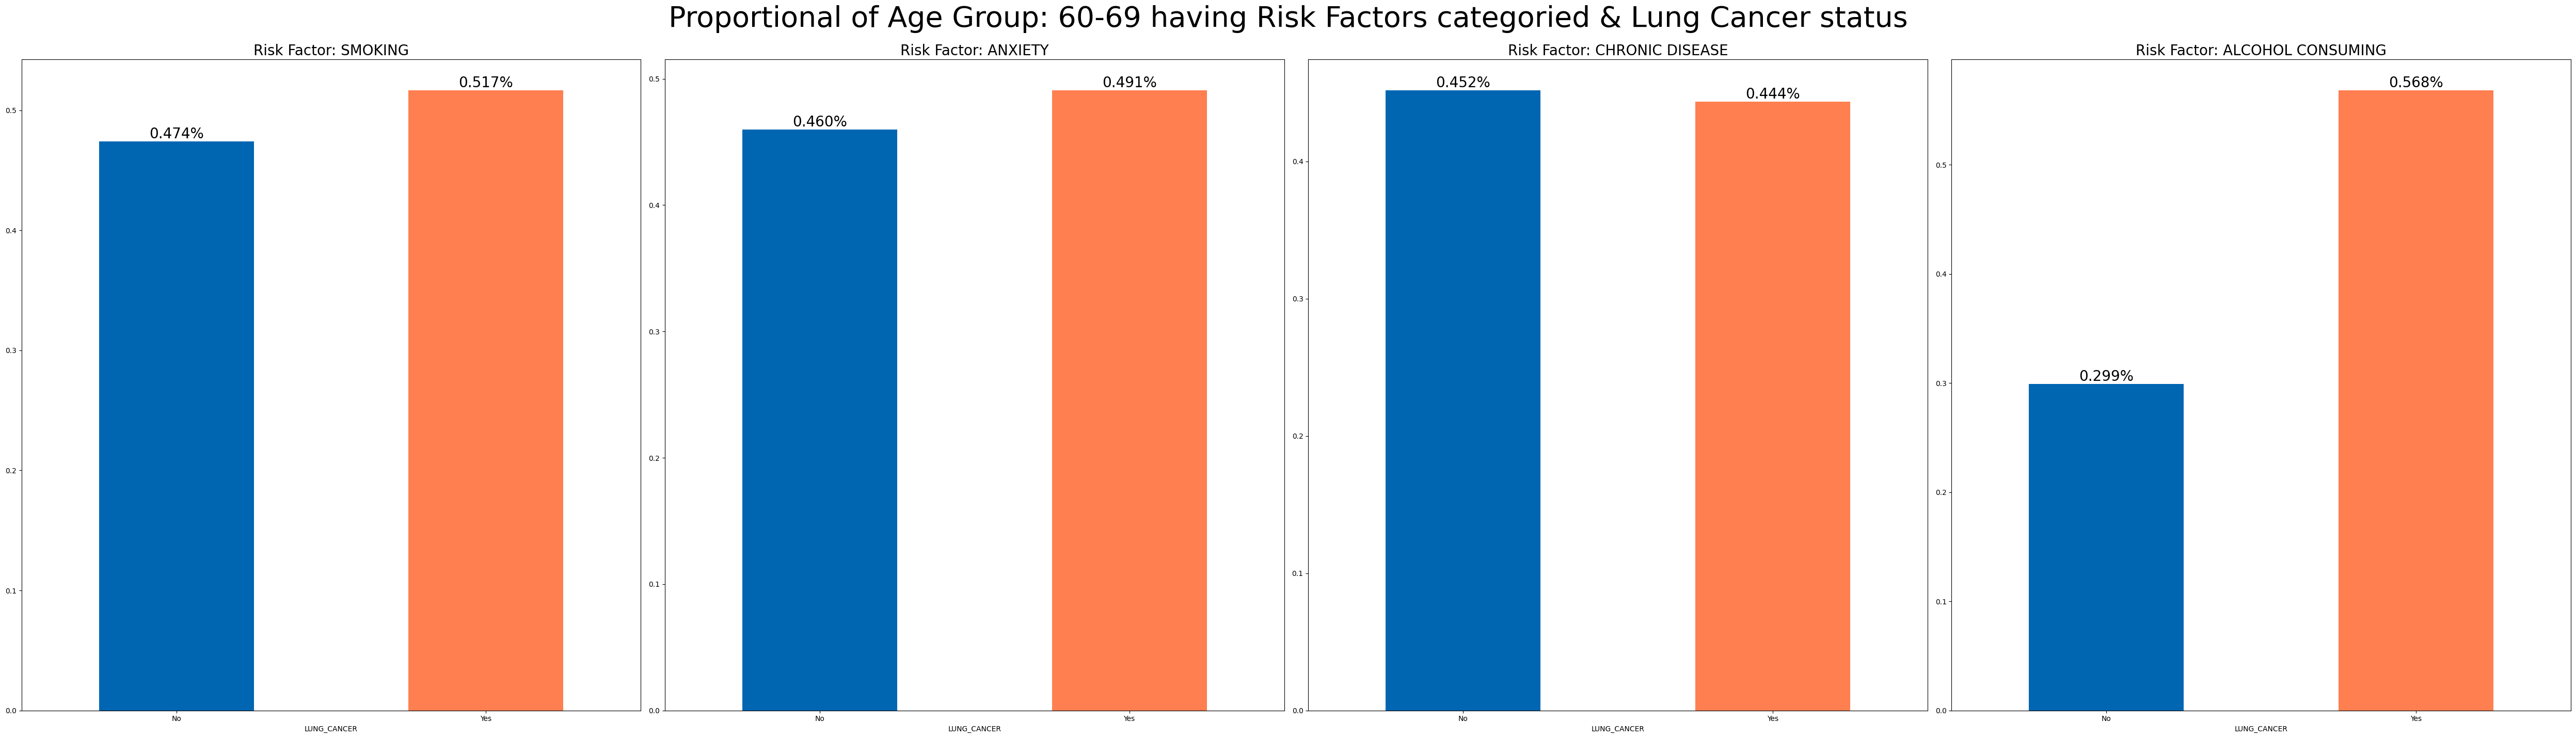

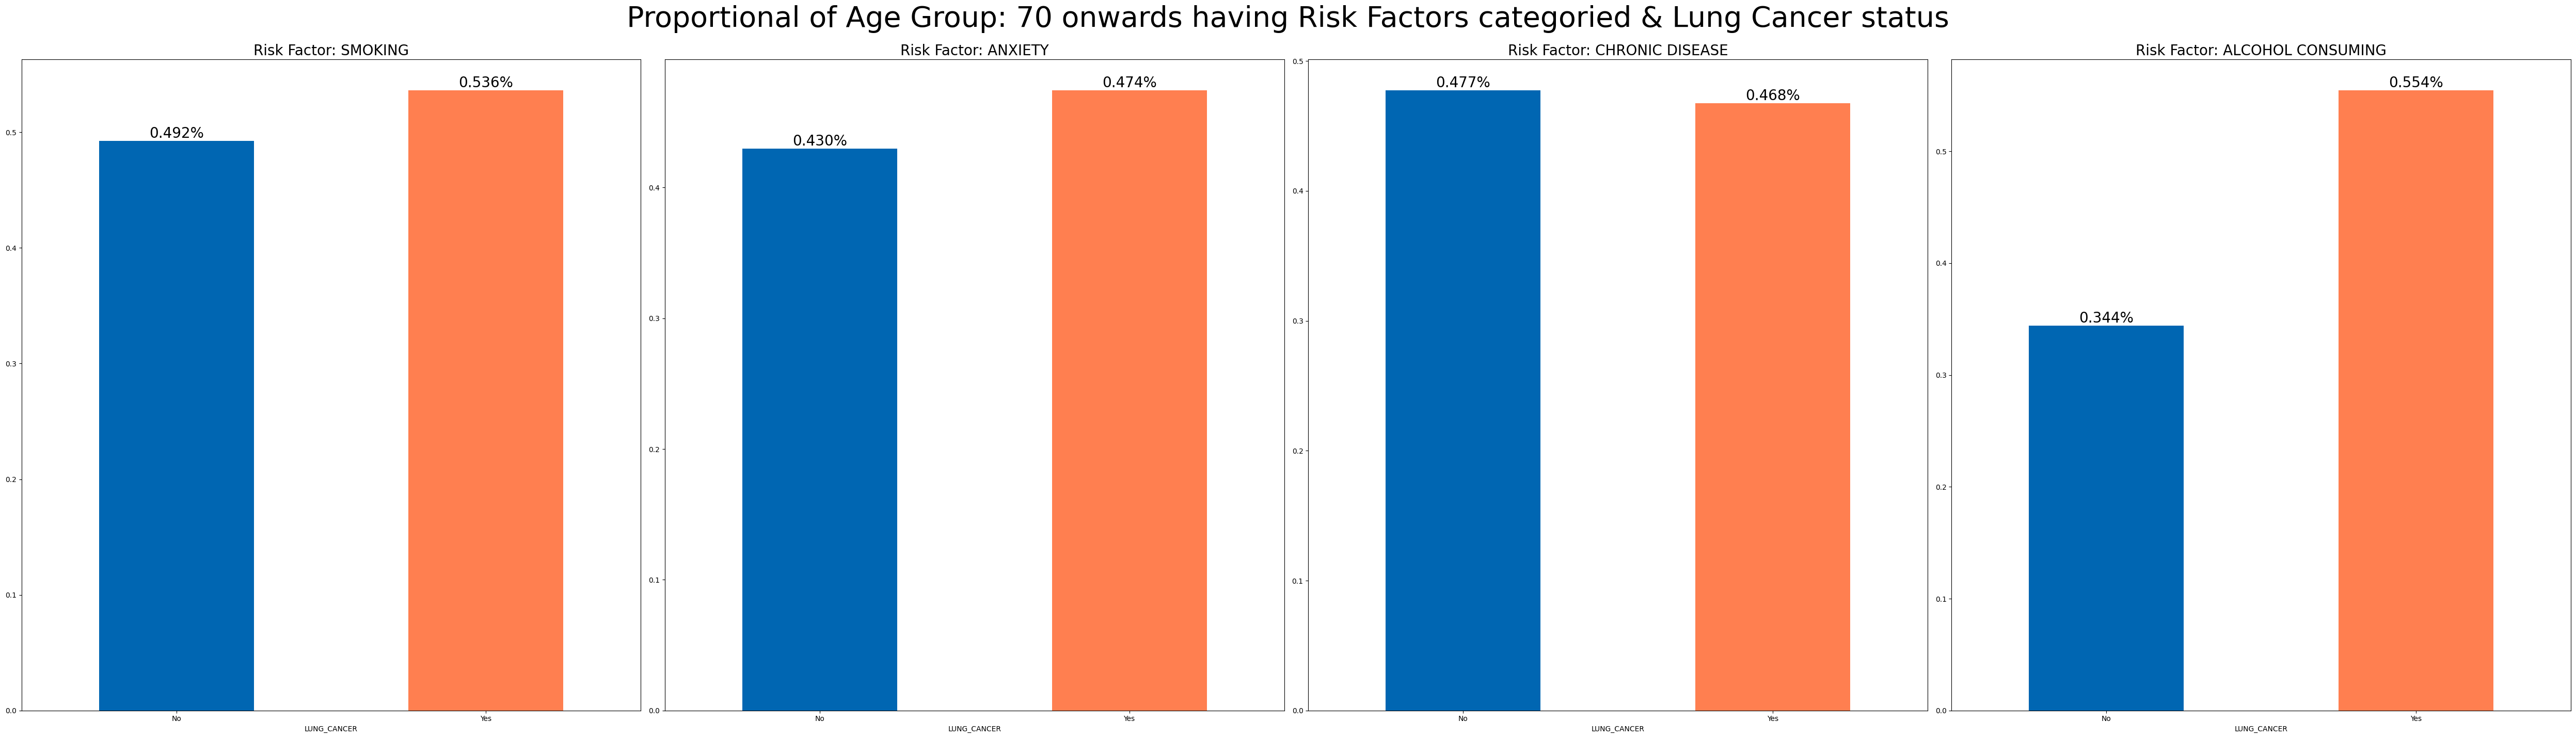

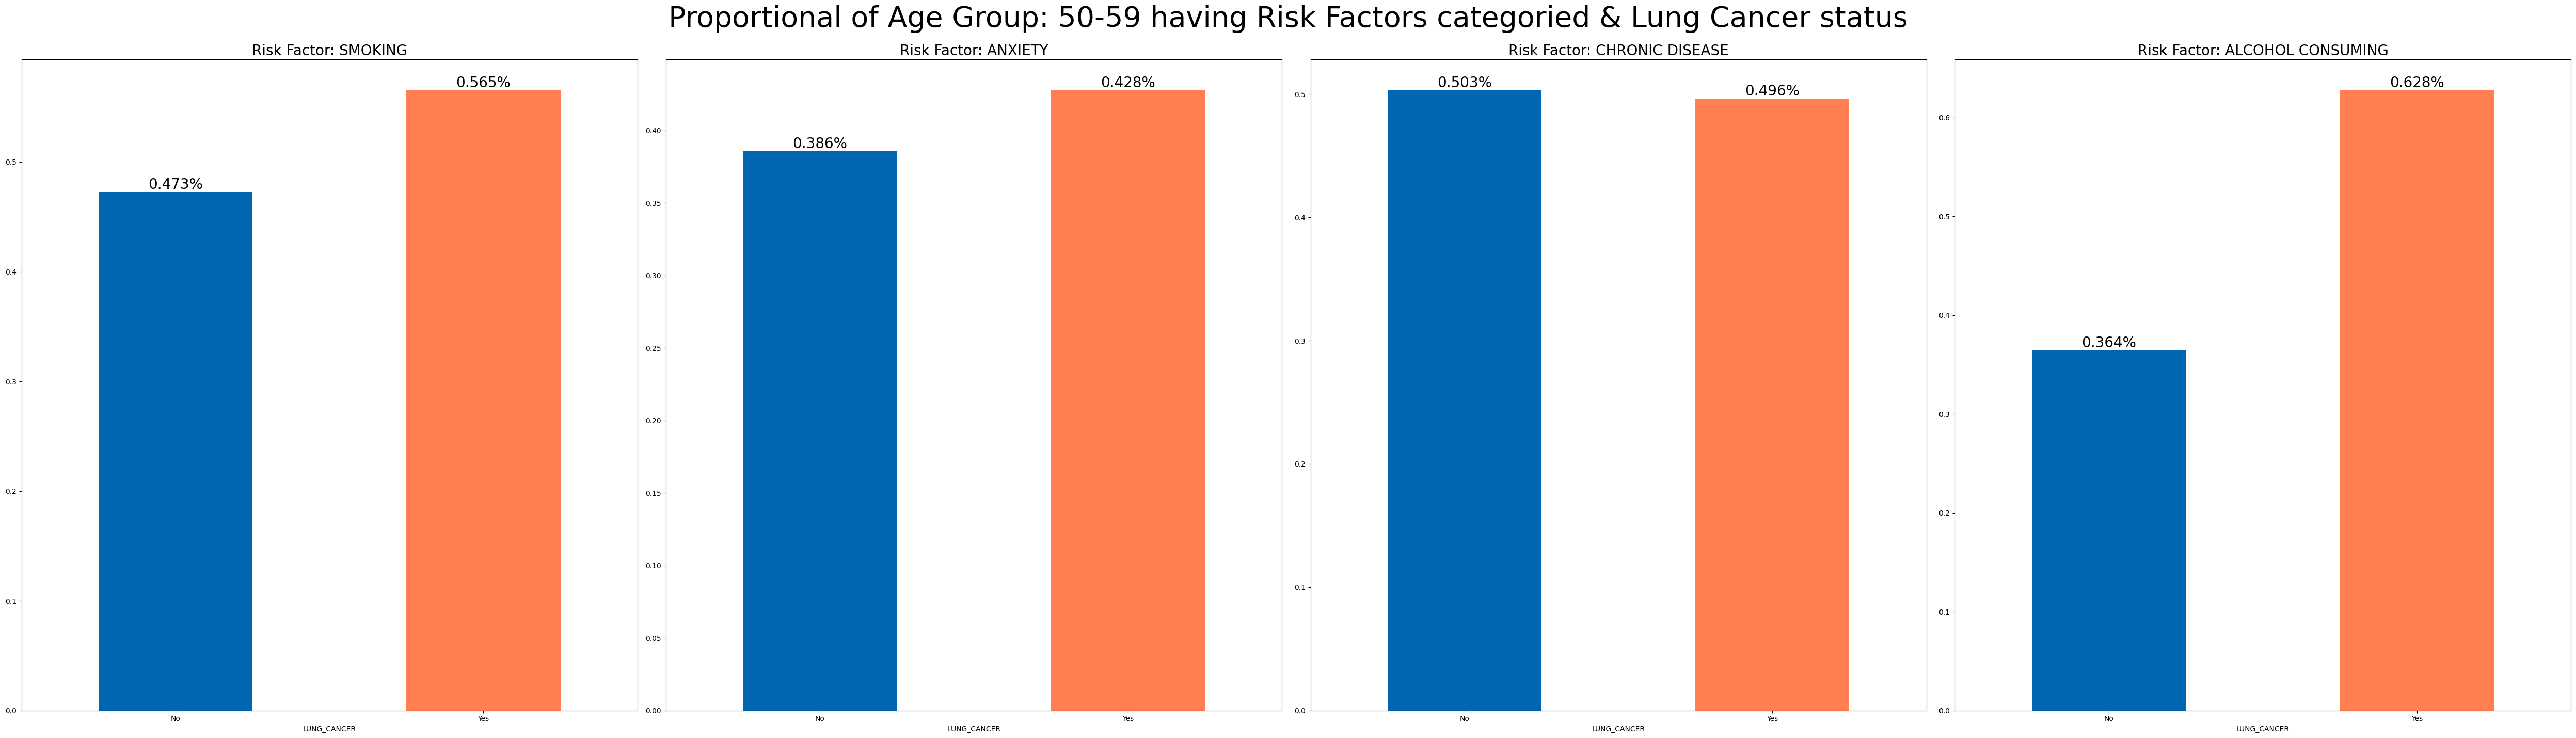

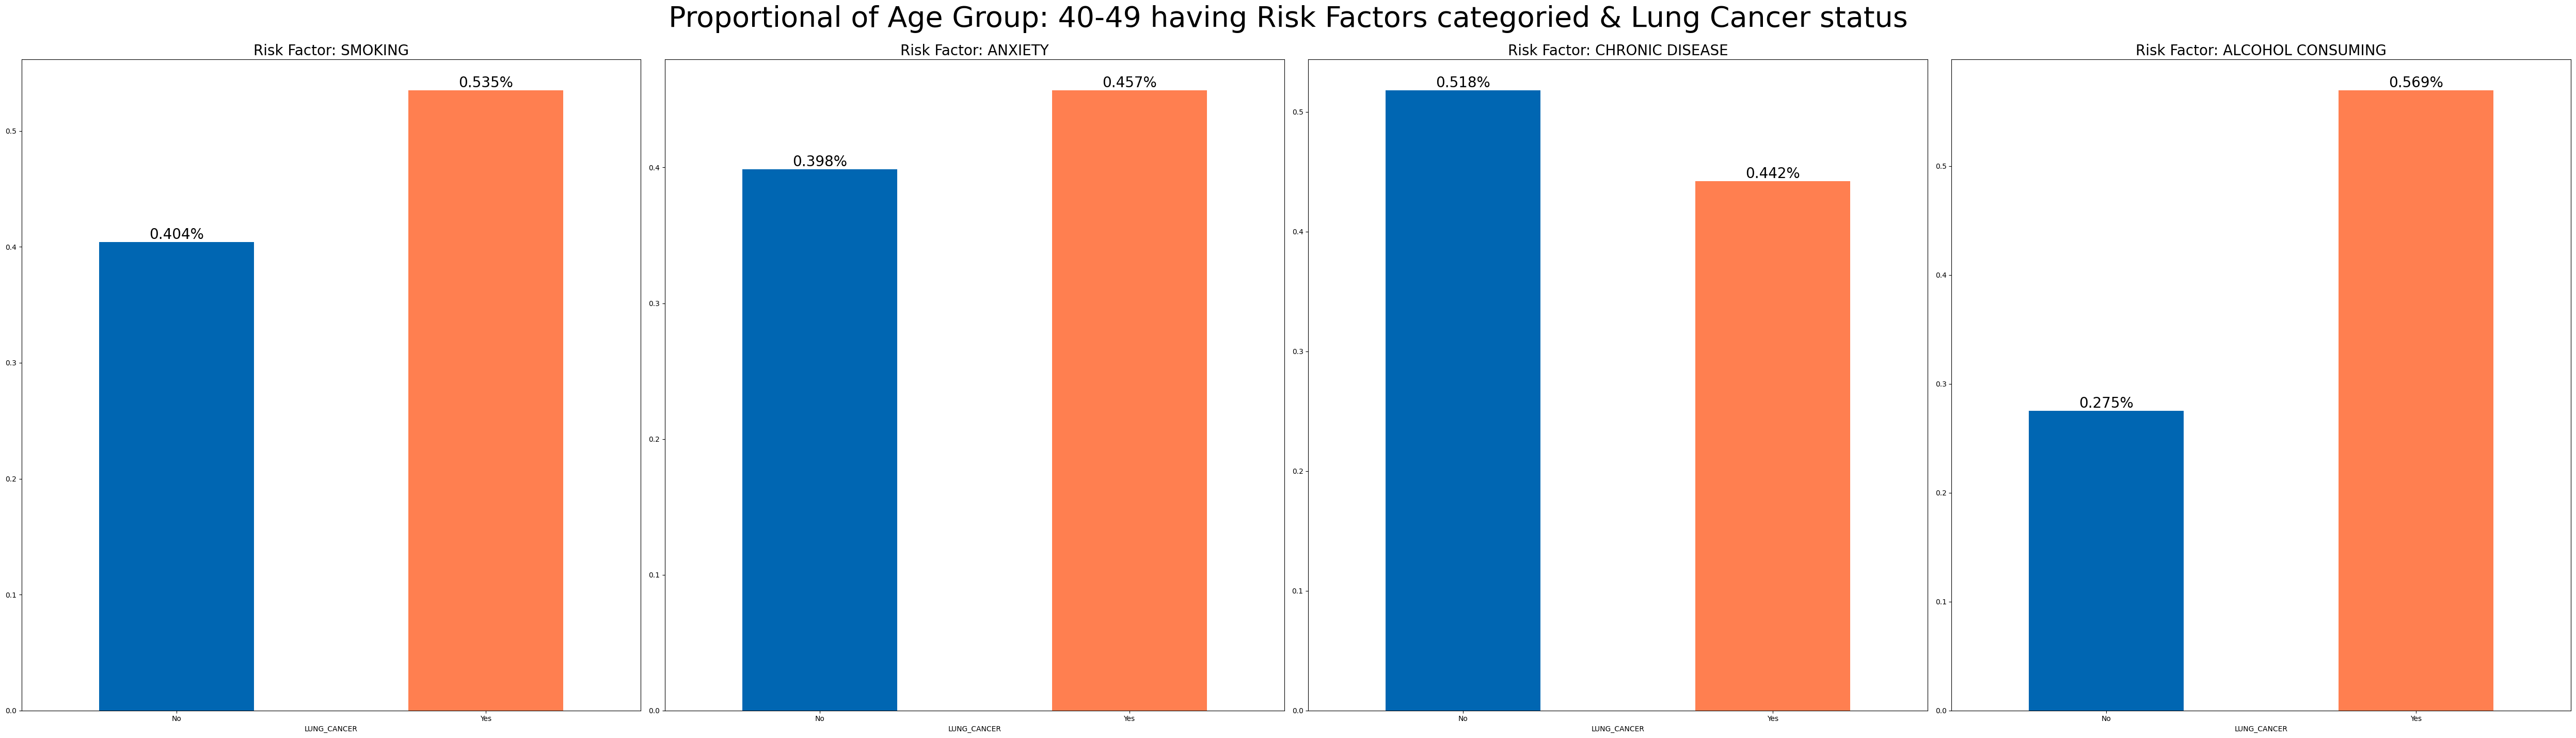

In [19]:
#Individual Age Category by Risk Factor
for i in df['AGE_CATEGORY'].unique():
    sub_data = df[(df['AGE_CATEGORY'] == i)]
    fig = plt.figure(figsize=(50, 15))
    count = 0
    for e in risk_factor:
            cross = pd.crosstab(sub_data[e], sub_data['LUNG_CANCER']).apply(lambda r: r/r.sum(), axis=0)
            axs = plt.subplot(1, 4, count + 1)
            c = ['#0066b2', '#FF7F50']
            cross.iloc[1,:].T.plot(kind = 'bar', ax = axs, color = c)
            for bar in axs.patches:  # Accessing all bar patches directly
                height = bar.get_height()
                axs.annotate(f'{height:.3f}%', (bar.get_x() + bar.get_width() / 2, height), ha = "center", va = 'bottom', fontsize = 20)
            axs.set_xticks([0,1], ["No", "Yes"], rotation = 'horizontal')
            axs.set_title(f'Risk Factor: {e}', fontsize = 20)
            count += 1
    fig.suptitle(f'Proportional of Age Group: {i} having Risk Factors categoried & Lung Cancer status', y = 0.95, fontsize = 40)    
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.29518072289156627, '0.295%')

Text(1.0, 0.5433526011560693, '0.543%')

Text(0.5, 1.0, 'Symptoms: YELLOW_FINGERS')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6104417670682731, '0.610%')

Text(1.0, 0.7157120336311088, '0.716%')

Text(0.5, 1.0, 'Symptoms: FATIGUE ')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5823293172690763, '0.582%')

Text(1.0, 0.47556489753021547, '0.476%')

Text(0.5, 1.0, 'Symptoms: WHEEZING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6004016064257028, '0.600%')

Text(1.0, 0.5564897530215449, '0.556%')

Text(0.5, 1.0, 'Symptoms: COUGHING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7248995983935743, '0.725%')

Text(1.0, 0.675775091960063, '0.676%')

Text(0.5, 1.0, 'Symptoms: SHORTNESS OF BREATH')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.21686746987951808, '0.217%')

Text(1.0, 0.3736205990541251, '0.374%')

Text(0.5, 1.0, 'Symptoms: SWALLOWING DIFFICULTY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6365461847389559, '0.637%')

Text(1.0, 0.6500262743037309, '0.650%')

Text(0.5, 1.0, 'Symptoms: CHEST PAIN')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.41164658634538154, '0.412%')

Text(1.0, 0.5712033631108776, '0.571%')

Text(0.5, 1.0, 'Symptoms: ALLERGY ')

Text(0.5, 0.95, 'Proportional of Age Group: 60-69 having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.35678391959798994, '0.357%')

Text(1.0, 0.5909745559289487, '0.591%')

Text(0.5, 1.0, 'Symptoms: YELLOW_FINGERS')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.678391959798995, '0.678%')

Text(1.0, 0.7325972155544888, '0.733%')

Text(0.5, 1.0, 'Symptoms: FATIGUE ')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5577889447236181, '0.558%')

Text(1.0, 0.4675948151704273, '0.468%')

Text(0.5, 1.0, 'Symptoms: WHEEZING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5628140703517588, '0.563%')

Text(1.0, 0.6245799327892463, '0.625%')

Text(0.5, 1.0, 'Symptoms: COUGHING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7613065326633166, '0.761%')

Text(1.0, 0.7095535285645703, '0.710%')

Text(0.5, 1.0, 'Symptoms: SHORTNESS OF BREATH')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.26884422110552764, '0.269%')

Text(1.0, 0.3638982237157945, '0.364%')

Text(0.5, 1.0, 'Symptoms: SWALLOWING DIFFICULTY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6432160804020101, '0.643%')

Text(1.0, 0.6313010081613059, '0.631%')

Text(0.5, 1.0, 'Symptoms: CHEST PAIN')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4723618090452261, '0.472%')

Text(1.0, 0.556889102256361, '0.557%')

Text(0.5, 1.0, 'Symptoms: ALLERGY ')

Text(0.5, 0.95, 'Proportional of Age Group: 70 onwards having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.33433734939759036, '0.334%')

Text(1.0, 0.583508036338225, '0.584%')

Text(0.5, 1.0, 'Symptoms: YELLOW_FINGERS')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5963855421686747, '0.596%')

Text(1.0, 0.6827393431167016, '0.683%')

Text(0.5, 1.0, 'Symptoms: FATIGUE ')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5783132530120482, '0.578%')

Text(1.0, 0.49615653389238296, '0.496%')

Text(0.5, 1.0, 'Symptoms: WHEEZING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5993975903614458, '0.599%')

Text(1.0, 0.5828092243186582, '0.583%')

Text(0.5, 1.0, 'Symptoms: COUGHING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7409638554216867, '0.741%')

Text(1.0, 0.6799440950384347, '0.680%')

Text(0.5, 1.0, 'Symptoms: SHORTNESS OF BREATH')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.24096385542168675, '0.241%')

Text(1.0, 0.3591893780573026, '0.359%')

Text(0.5, 1.0, 'Symptoms: SWALLOWING DIFFICULTY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6295180722891566, '0.630%')

Text(1.0, 0.610062893081761, '0.610%')

Text(0.5, 1.0, 'Symptoms: CHEST PAIN')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4066265060240964, '0.407%')

Text(1.0, 0.5779175401816912, '0.578%')

Text(0.5, 1.0, 'Symptoms: ALLERGY ')

Text(0.5, 0.95, 'Proportional of Age Group: 50-59 having Risk Factors categoried & Lung Cancer status')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2637571157495256, '0.264%')

Text(1.0, 0.6088621444201313, '0.609%')

Text(0.5, 1.0, 'Symptoms: YELLOW_FINGERS')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5578747628083491, '0.558%')

Text(1.0, 0.688183807439825, '0.688%')

Text(0.5, 1.0, 'Symptoms: FATIGUE ')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5692599620493358, '0.569%')

Text(1.0, 0.44912472647702406, '0.449%')

Text(0.5, 1.0, 'Symptoms: WHEEZING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6091081593927894, '0.609%')

Text(1.0, 0.6061269146608315, '0.606%')

Text(0.5, 1.0, 'Symptoms: COUGHING')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7533206831119544, '0.753%')

Text(1.0, 0.6772428884026258, '0.677%')

Text(0.5, 1.0, 'Symptoms: SHORTNESS OF BREATH')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2504743833017078, '0.250%')

Text(1.0, 0.3949671772428884, '0.395%')

Text(0.5, 1.0, 'Symptoms: SWALLOWING DIFFICULTY')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6489563567362429, '0.649%')

Text(1.0, 0.6028446389496718, '0.603%')

Text(0.5, 1.0, 'Symptoms: CHEST PAIN')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4648956356736243, '0.465%')

Text(1.0, 0.5946389496717724, '0.595%')

Text(0.5, 1.0, 'Symptoms: ALLERGY ')

Text(0.5, 0.95, 'Proportional of Age Group: 40-49 having Risk Factors categoried & Lung Cancer status')

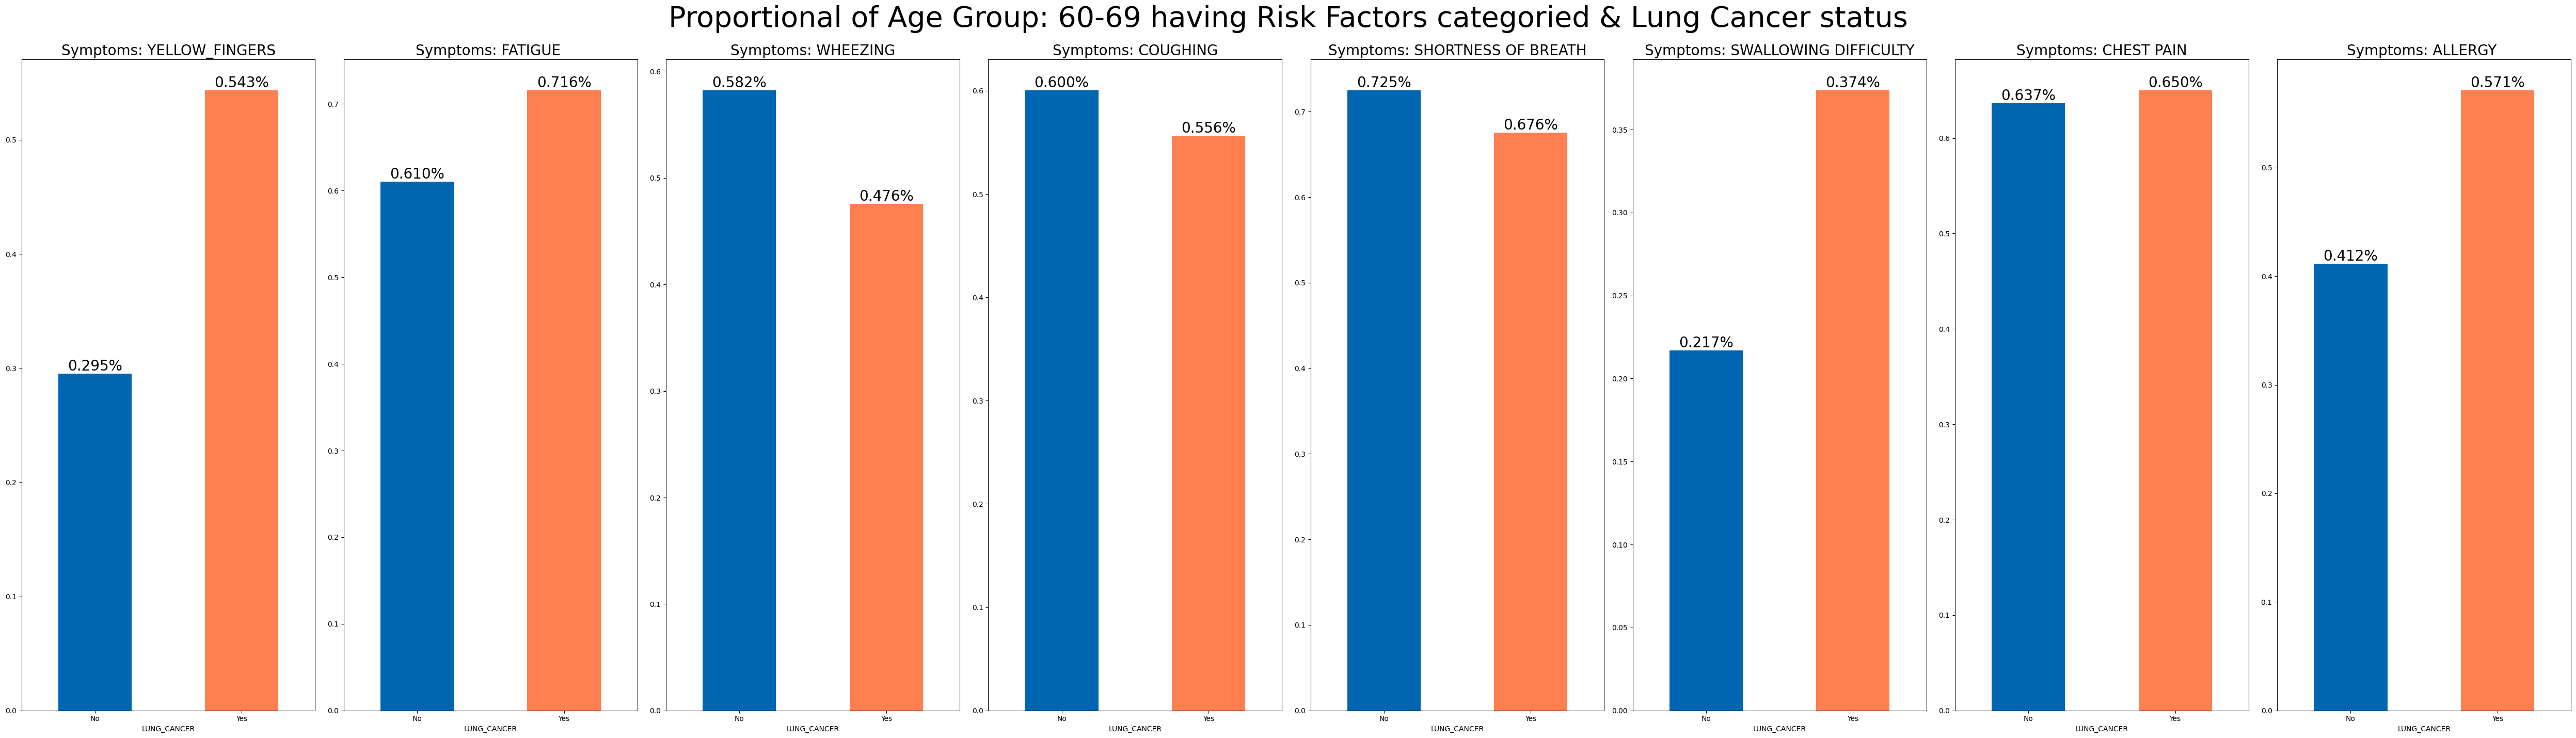

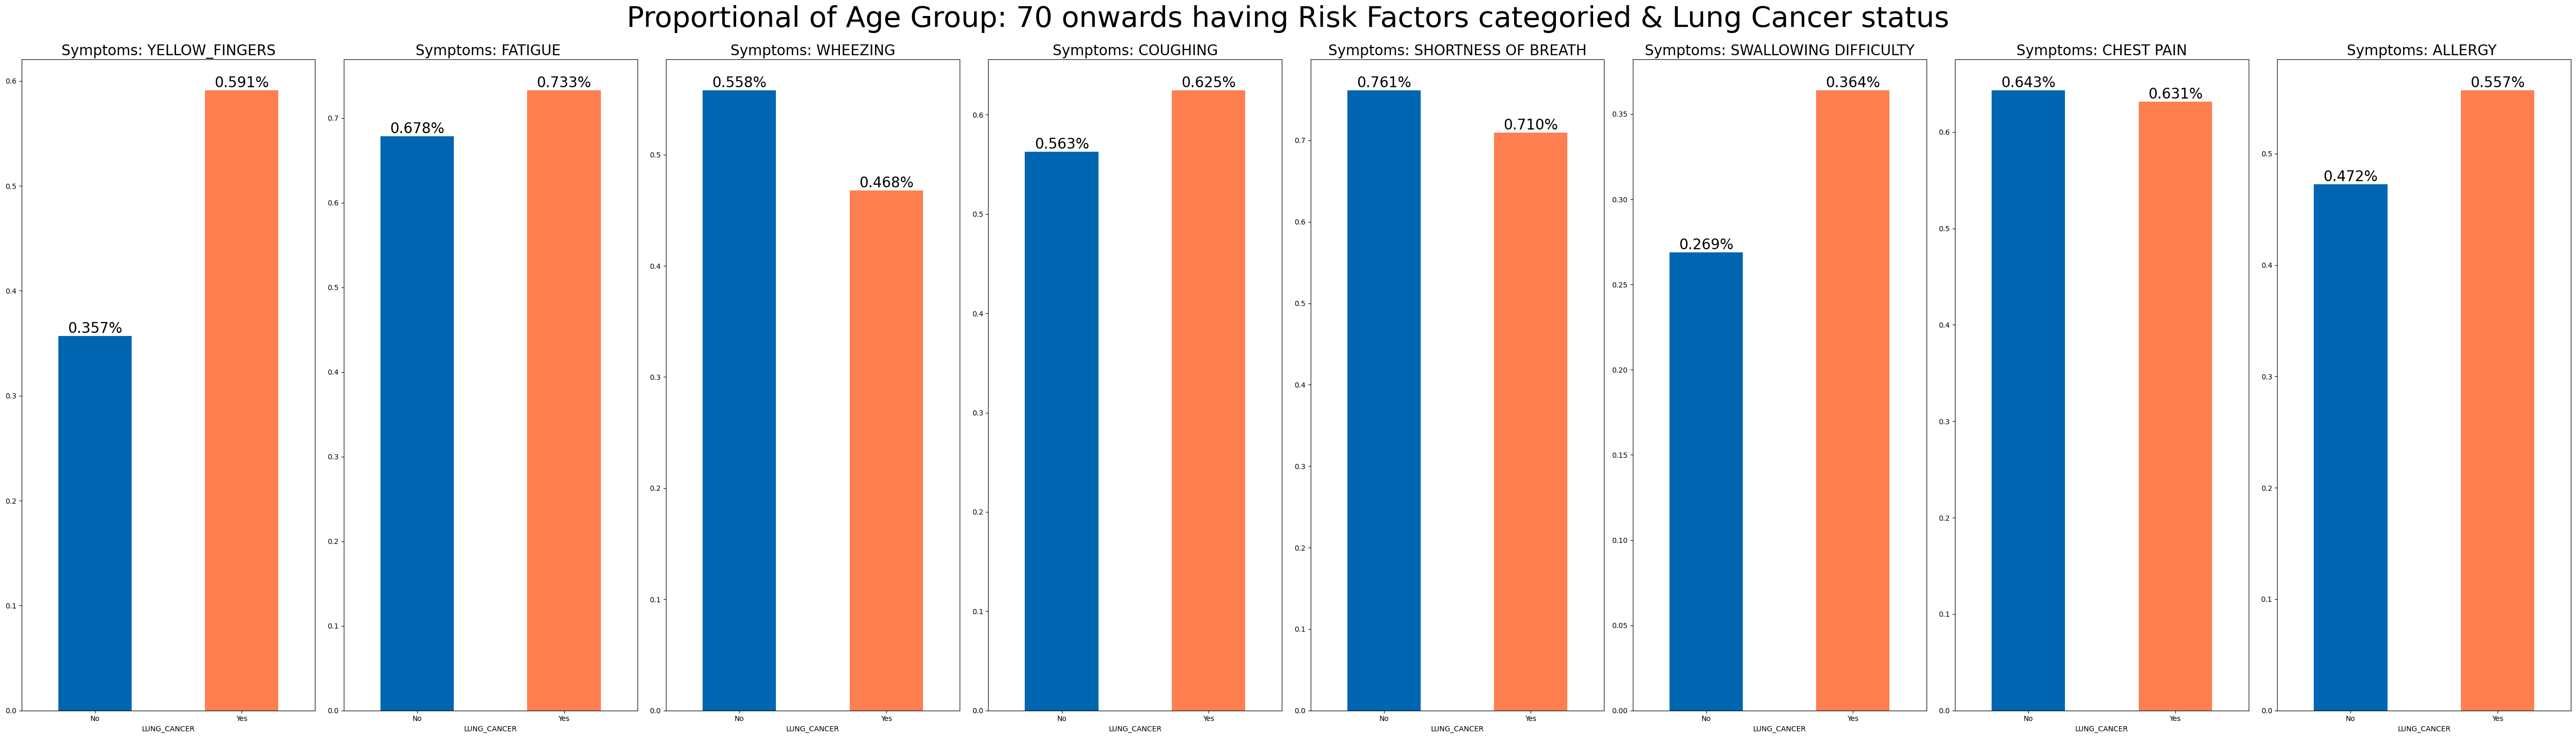

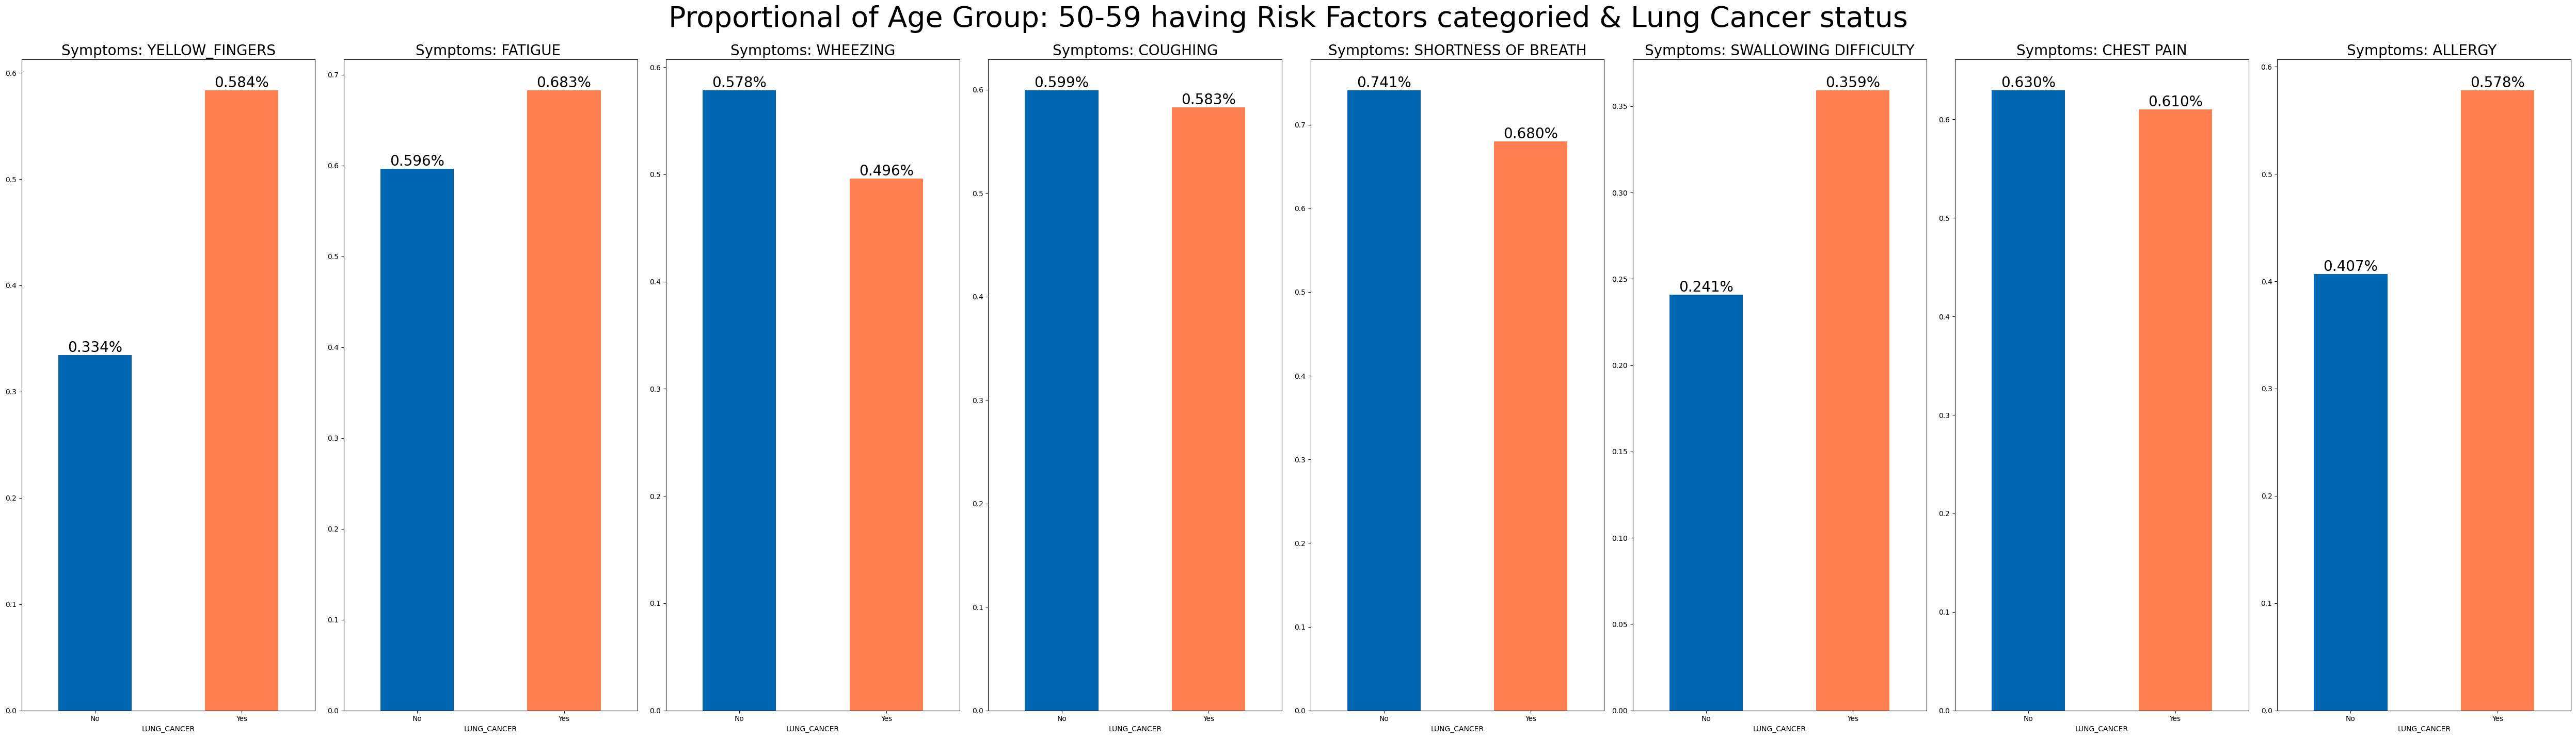

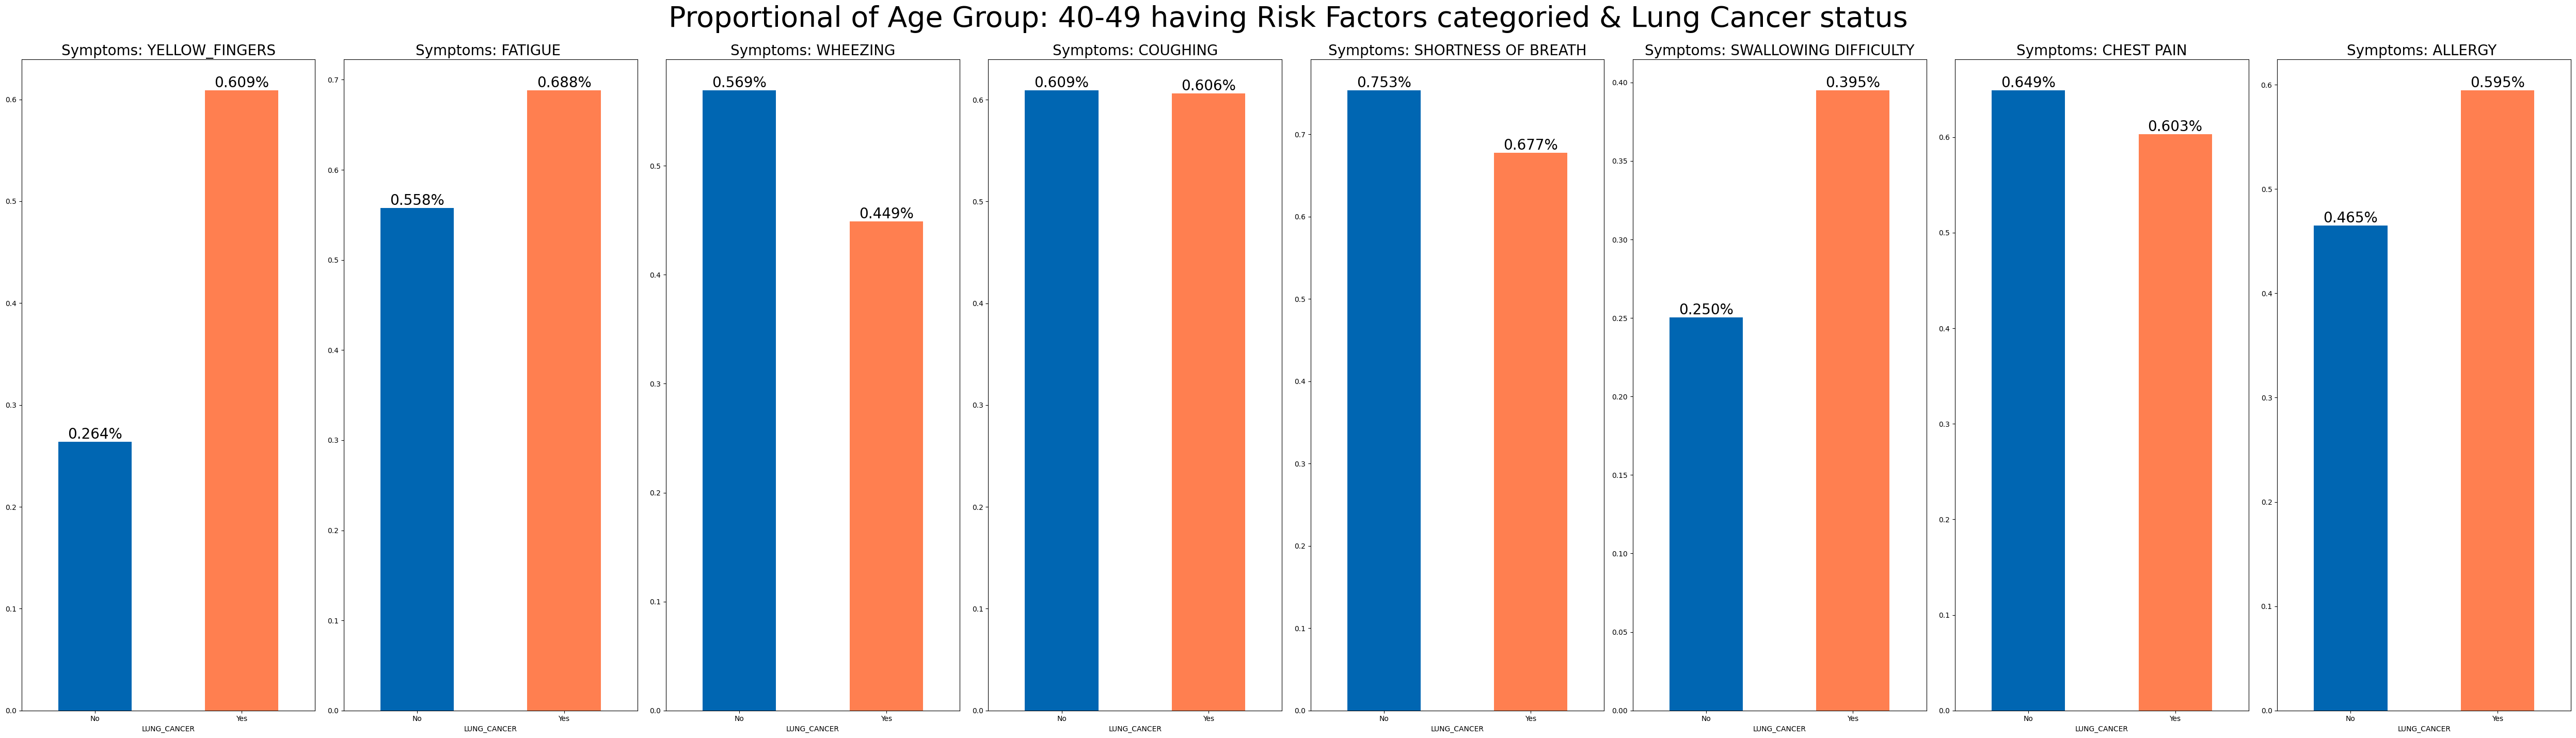

In [20]:
#Individual Age Category by Symptoms Analysis
for i in df['AGE_CATEGORY'].unique():
    sub_data = df[(df['AGE_CATEGORY'] == i)]
    fig = plt.figure(figsize=(50, 15))
    count = 0
    for e in symptoms:
            cross = pd.crosstab(sub_data[e], sub_data['LUNG_CANCER']).apply(lambda r: r/r.sum(), axis=0)
            axs = plt.subplot(1, 8, count + 1)
            c = ['#0066b2', '#FF7F50']
            cross.iloc[1,:].T.plot(kind = 'bar', ax = axs, color = c)
            for bar in axs.patches:  # Accessing all bar patches directly
                height = bar.get_height()
                axs.annotate(f'{height:.3f}%', (bar.get_x() + bar.get_width() / 2, height), ha = "center", va = 'bottom', fontsize = 20)
            axs.set_xticks([0,1], ["No", "Yes"], rotation = 'horizontal')
            axs.set_title(f'Symptoms: {e}', fontsize = 20)
            count += 1
    fig.suptitle(f'Proportional of Age Group: {i} having Risk Factors categoried & Lung Cancer status', y = 0.95, fontsize = 40)    
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4738955823293173, '0.474%')

Text(1.0, 0.5165528113504992, '0.517%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.49246231155778897, '0.492%')

Text(1.0, 0.5362457993278925, '0.536%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.47289156626506024, '0.473%')

Text(1.0, 0.5653389238294899, '0.565%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.40417457305502846, '0.404%')

Text(1.0, 0.5350109409190372, '0.535%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with SMOKING categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4598393574297189, '0.460%')

Text(1.0, 0.4908039936941671, '0.491%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4296482412060301, '0.430%')

Text(1.0, 0.4743158905424868, '0.474%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3855421686746988, '0.386%')

Text(1.0, 0.4276729559748428, '0.428%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3984819734345351, '0.398%')

Text(1.0, 0.45678336980306344, '0.457%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with ANXIETY categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.45180722891566266, '0.452%')

Text(1.0, 0.4435102469784551, '0.444%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.47738693467336685, '0.477%')

Text(1.0, 0.4675948151704273, '0.468%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5030120481927711, '0.503%')

Text(1.0, 0.49615653389238296, '0.496%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5180265654648957, '0.518%')

Text(1.0, 0.4420131291028446, '0.442%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with CHRONIC DISEASE categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2991967871485944, '0.299%')

Text(1.0, 0.5680504466631634, '0.568%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3442211055276382, '0.344%')

Text(1.0, 0.5544887181949112, '0.554%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.3644578313253012, '0.364%')

Text(1.0, 0.6275331935709294, '0.628%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.27514231499051234, '0.275%')

Text(1.0, 0.5694748358862144, '0.569%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with ALCOHOL CONSUMING categoried by Age Group & Lung Cancer')

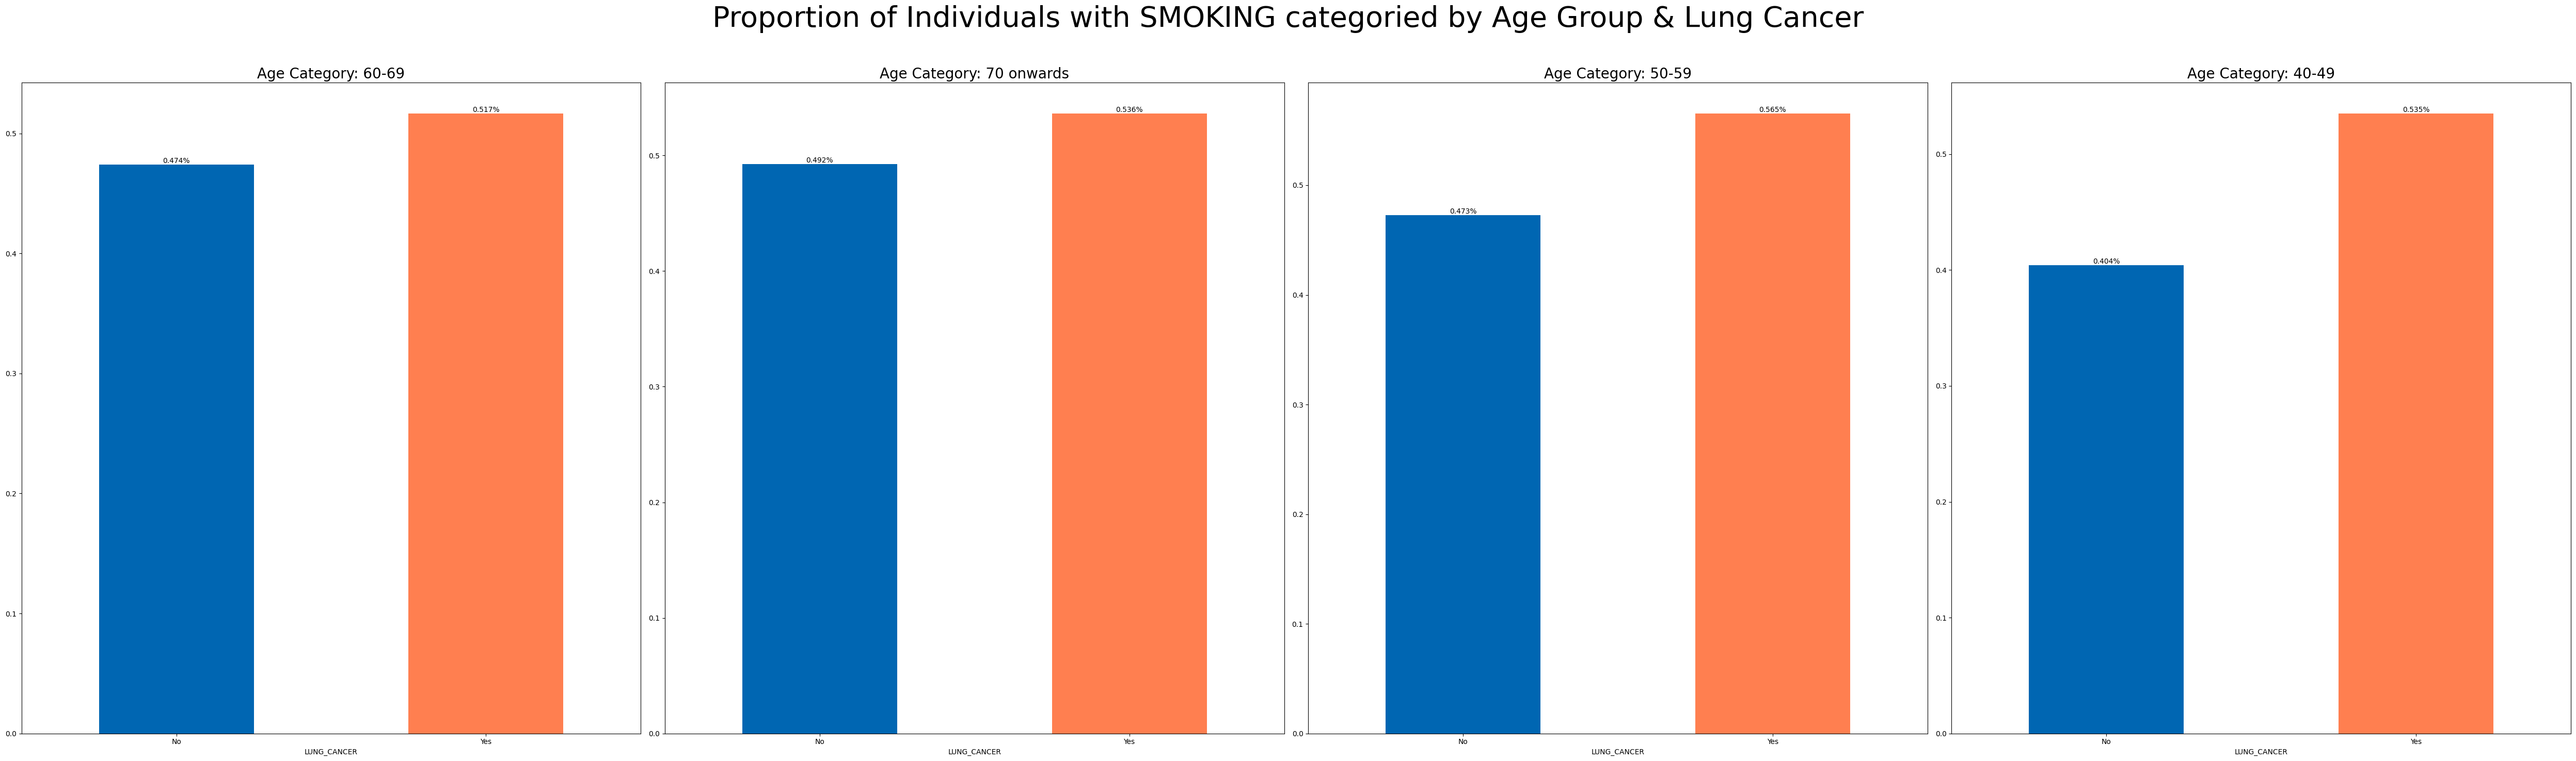

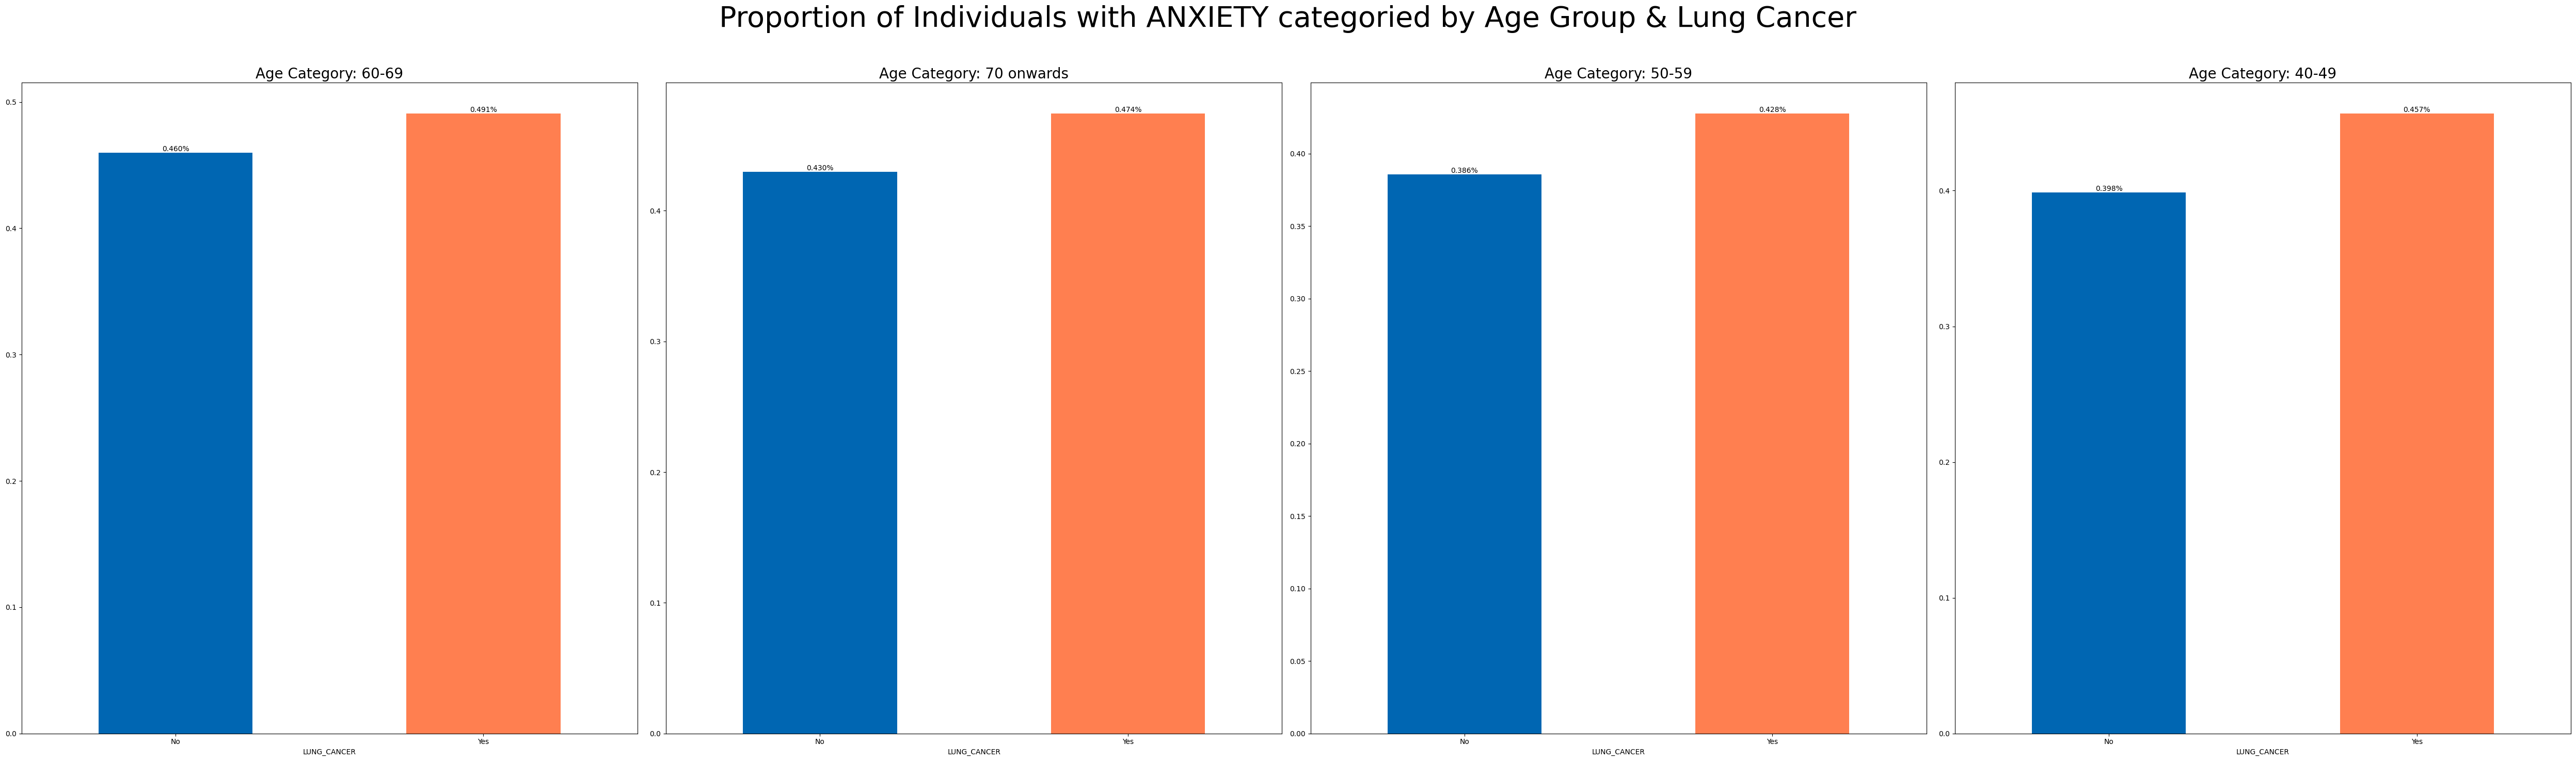

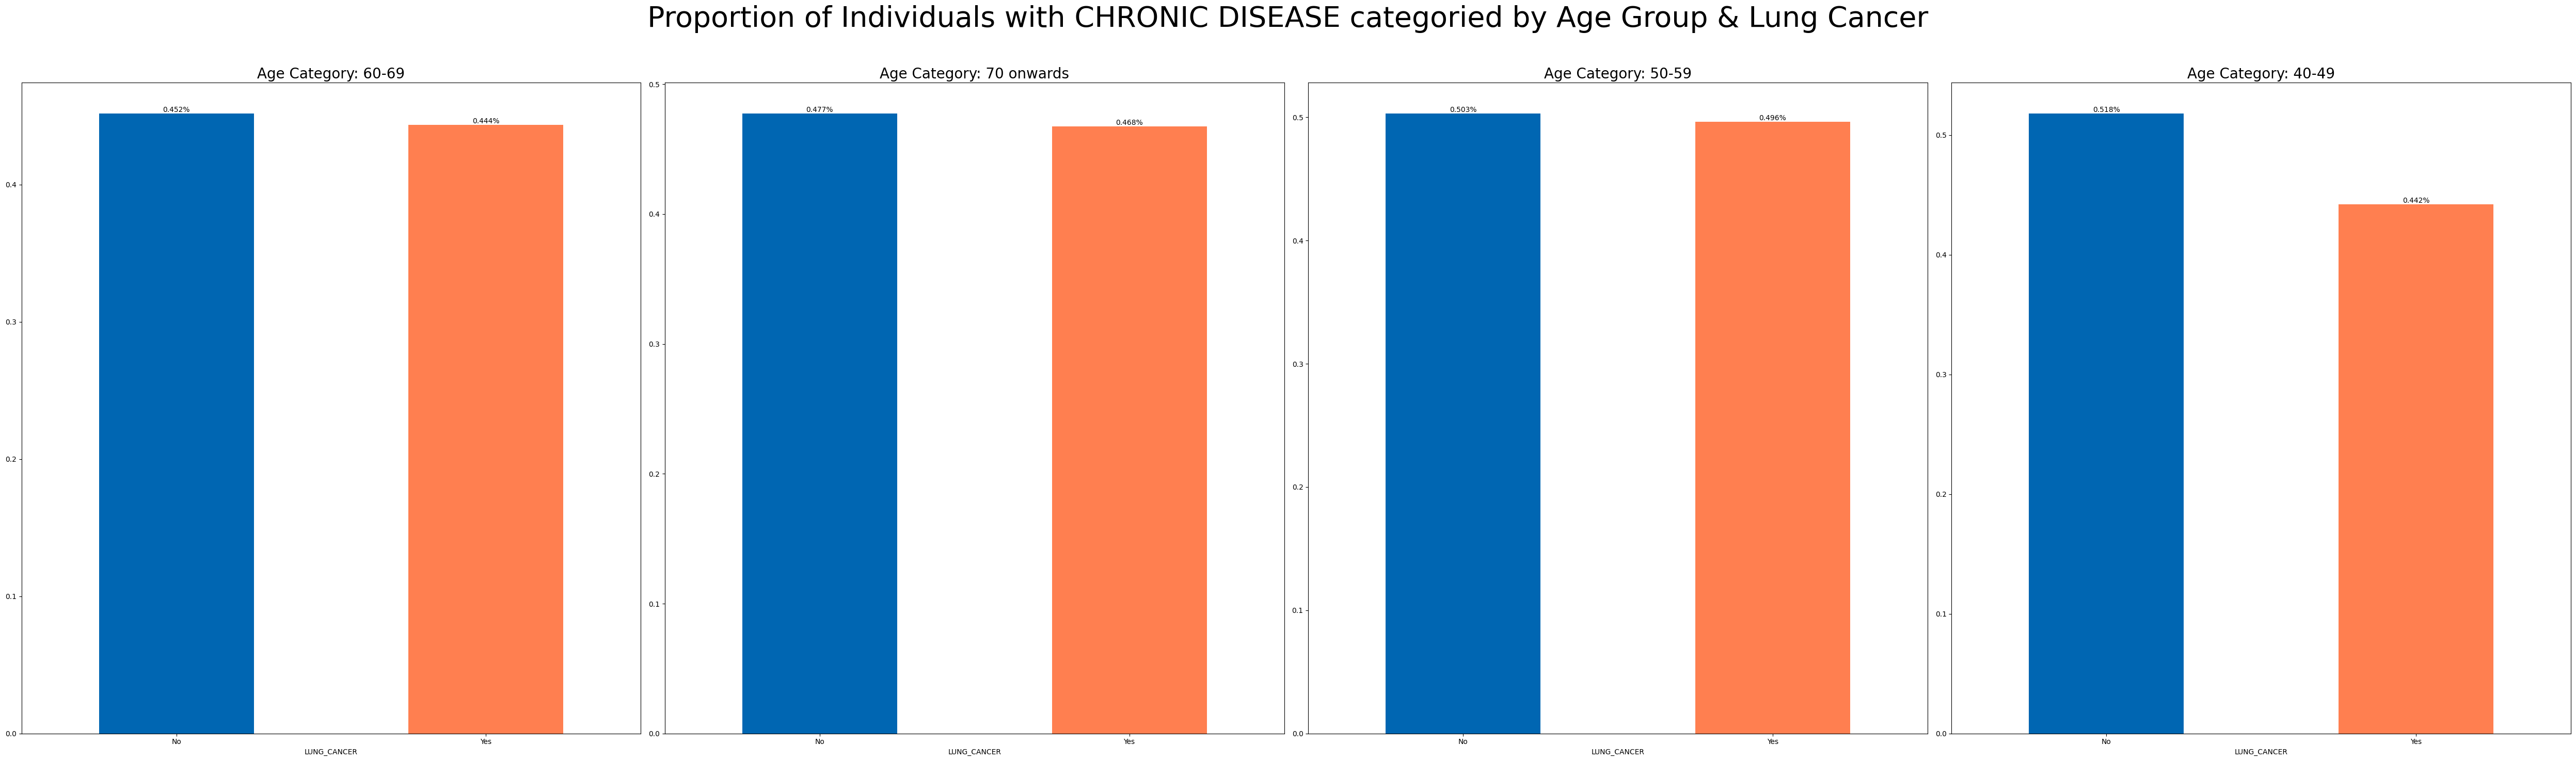

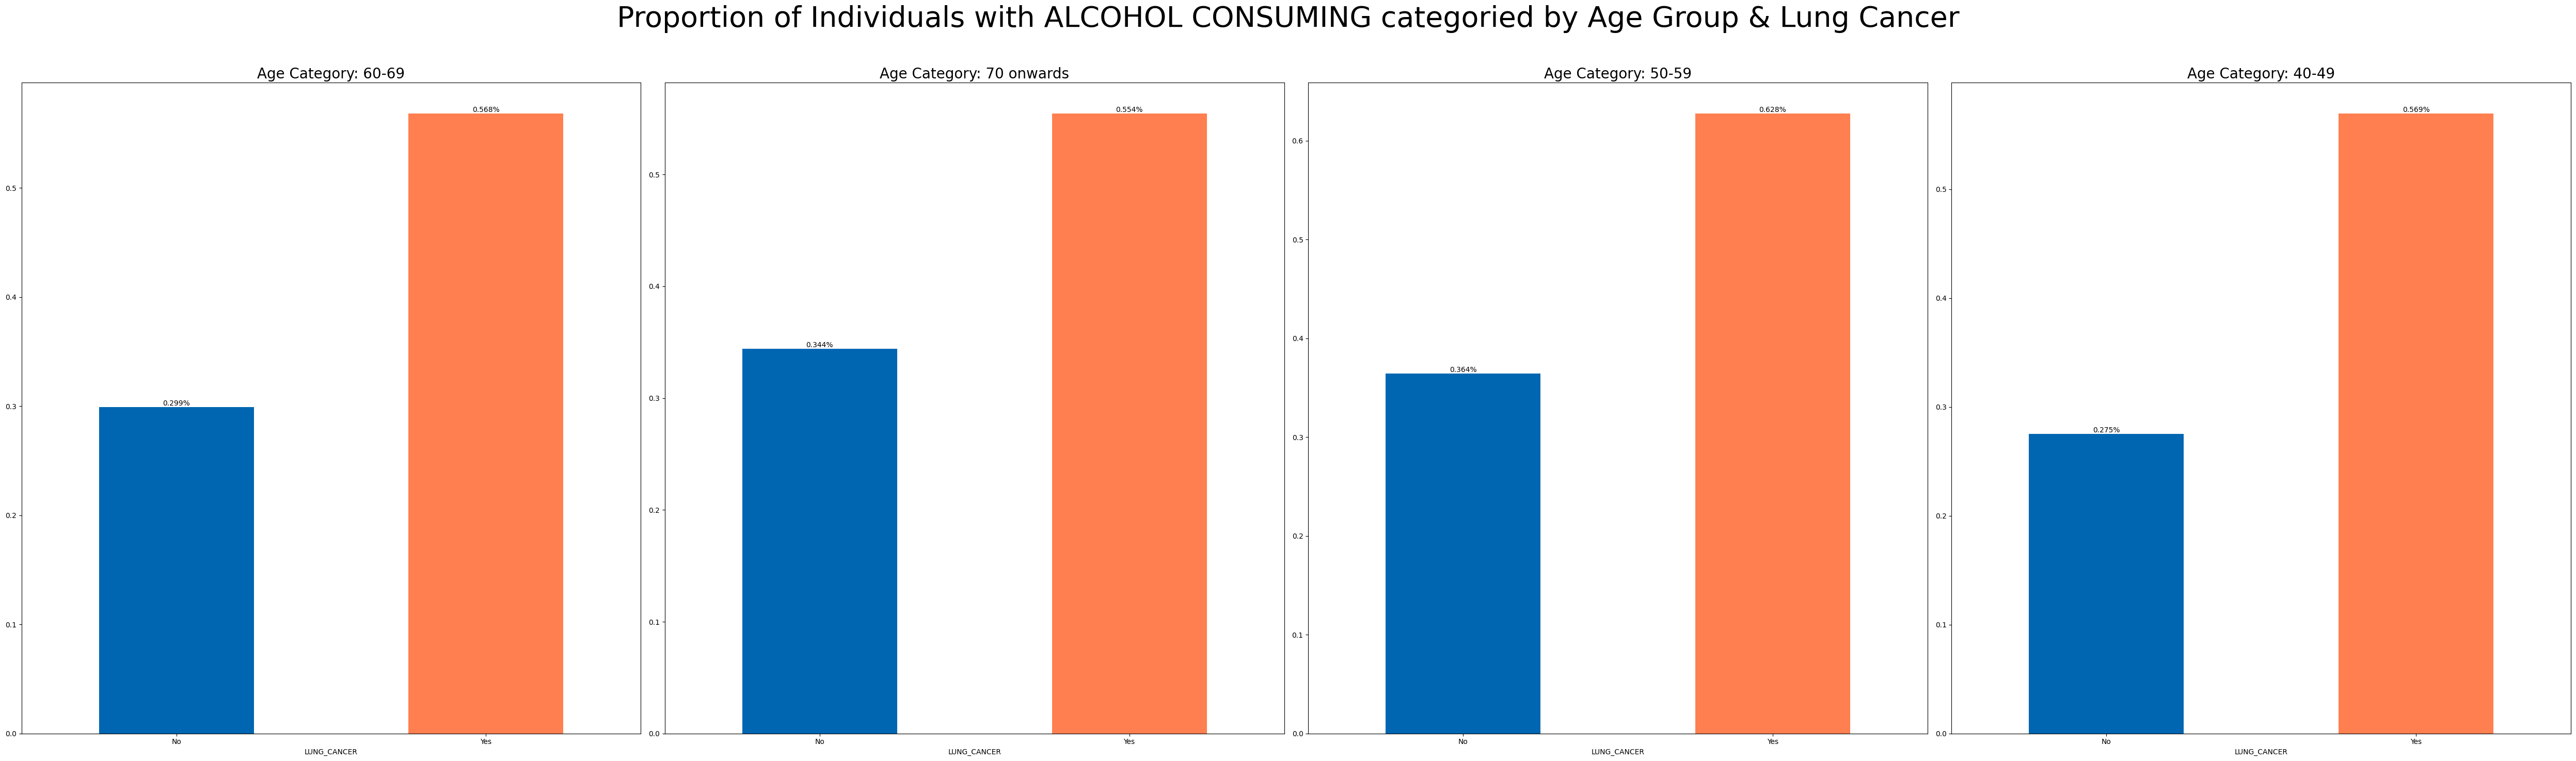

In [17]:
#Individual Risk Factor Analysis by Age Category
for e in risk_factor:
    fig = plt.figure(figsize=(50, 15))
    count = 0
    for i in df['AGE_CATEGORY'].unique():
        sub_data = df[df['AGE_CATEGORY'] == i]
        cross = pd.crosstab(sub_data[e], sub_data['LUNG_CANCER']).apply(lambda r: r/r.sum(), axis=0)
        axs = fig.add_subplot(1, 4, count + 1)
        c = ['#0066b2', '#FF7F50']
        cross.iloc[1,:].T.plot(kind = 'bar', ax = axs, color = c)
        for bar in axs.patches:  # Accessing all bar patches directly
            height = bar.get_height()
            axs.annotate(f'{height:.3f}%', (bar.get_x() + bar.get_width() / 2, height), ha = "center", va = 'bottom')
        axs.set_xticks([0,1], ["No", "Yes"], rotation = 'horizontal')
        axs.set_title(f'Age Category: {i}', fontsize = 20)
        count += 1
    fig.suptitle(f'Proportion of Individuals with {e} categoried by Age Group & Lung Cancer', y = 0.98, fontsize = 40)    
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.29518072289156627, '0.295%')

Text(1.0, 0.5433526011560693, '0.543%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.35678391959798994, '0.357%')

Text(1.0, 0.5909745559289487, '0.591%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.33433734939759036, '0.334%')

Text(1.0, 0.583508036338225, '0.584%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2637571157495256, '0.264%')

Text(1.0, 0.6088621444201313, '0.609%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with YELLOW_FINGERS categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6104417670682731, '0.610%')

Text(1.0, 0.7157120336311088, '0.716%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.678391959798995, '0.678%')

Text(1.0, 0.7325972155544888, '0.733%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5963855421686747, '0.596%')

Text(1.0, 0.6827393431167016, '0.683%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5578747628083491, '0.558%')

Text(1.0, 0.688183807439825, '0.688%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with FATIGUE  categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5823293172690763, '0.582%')

Text(1.0, 0.47556489753021547, '0.476%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5577889447236181, '0.558%')

Text(1.0, 0.4675948151704273, '0.468%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5783132530120482, '0.578%')

Text(1.0, 0.49615653389238296, '0.496%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5692599620493358, '0.569%')

Text(1.0, 0.44912472647702406, '0.449%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with WHEEZING categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6004016064257028, '0.600%')

Text(1.0, 0.5564897530215449, '0.556%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5628140703517588, '0.563%')

Text(1.0, 0.6245799327892463, '0.625%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.5993975903614458, '0.599%')

Text(1.0, 0.5828092243186582, '0.583%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6091081593927894, '0.609%')

Text(1.0, 0.6061269146608315, '0.606%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with COUGHING categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7248995983935743, '0.725%')

Text(1.0, 0.675775091960063, '0.676%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7613065326633166, '0.761%')

Text(1.0, 0.7095535285645703, '0.710%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7409638554216867, '0.741%')

Text(1.0, 0.6799440950384347, '0.680%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.7533206831119544, '0.753%')

Text(1.0, 0.6772428884026258, '0.677%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with SHORTNESS OF BREATH categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.21686746987951808, '0.217%')

Text(1.0, 0.3736205990541251, '0.374%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.26884422110552764, '0.269%')

Text(1.0, 0.3638982237157945, '0.364%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.24096385542168675, '0.241%')

Text(1.0, 0.3591893780573026, '0.359%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.2504743833017078, '0.250%')

Text(1.0, 0.3949671772428884, '0.395%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with SWALLOWING DIFFICULTY categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6365461847389559, '0.637%')

Text(1.0, 0.6500262743037309, '0.650%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6432160804020101, '0.643%')

Text(1.0, 0.6313010081613059, '0.631%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6295180722891566, '0.630%')

Text(1.0, 0.610062893081761, '0.610%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.6489563567362429, '0.649%')

Text(1.0, 0.6028446389496718, '0.603%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with CHEST PAIN categoried by Age Group & Lung Cancer')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.41164658634538154, '0.412%')

Text(1.0, 0.5712033631108776, '0.571%')

Text(0.5, 1.0, 'Age Category: 60-69')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4723618090452261, '0.472%')

Text(1.0, 0.556889102256361, '0.557%')

Text(0.5, 1.0, 'Age Category: 70 onwards')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4066265060240964, '0.407%')

Text(1.0, 0.5779175401816912, '0.578%')

Text(0.5, 1.0, 'Age Category: 50-59')

<Axes: xlabel='LUNG_CANCER'>

Text(0.0, 0.4648956356736243, '0.465%')

Text(1.0, 0.5946389496717724, '0.595%')

Text(0.5, 1.0, 'Age Category: 40-49')

Text(0.5, 0.98, 'Proportion of Individuals with ALLERGY  categoried by Age Group & Lung Cancer')

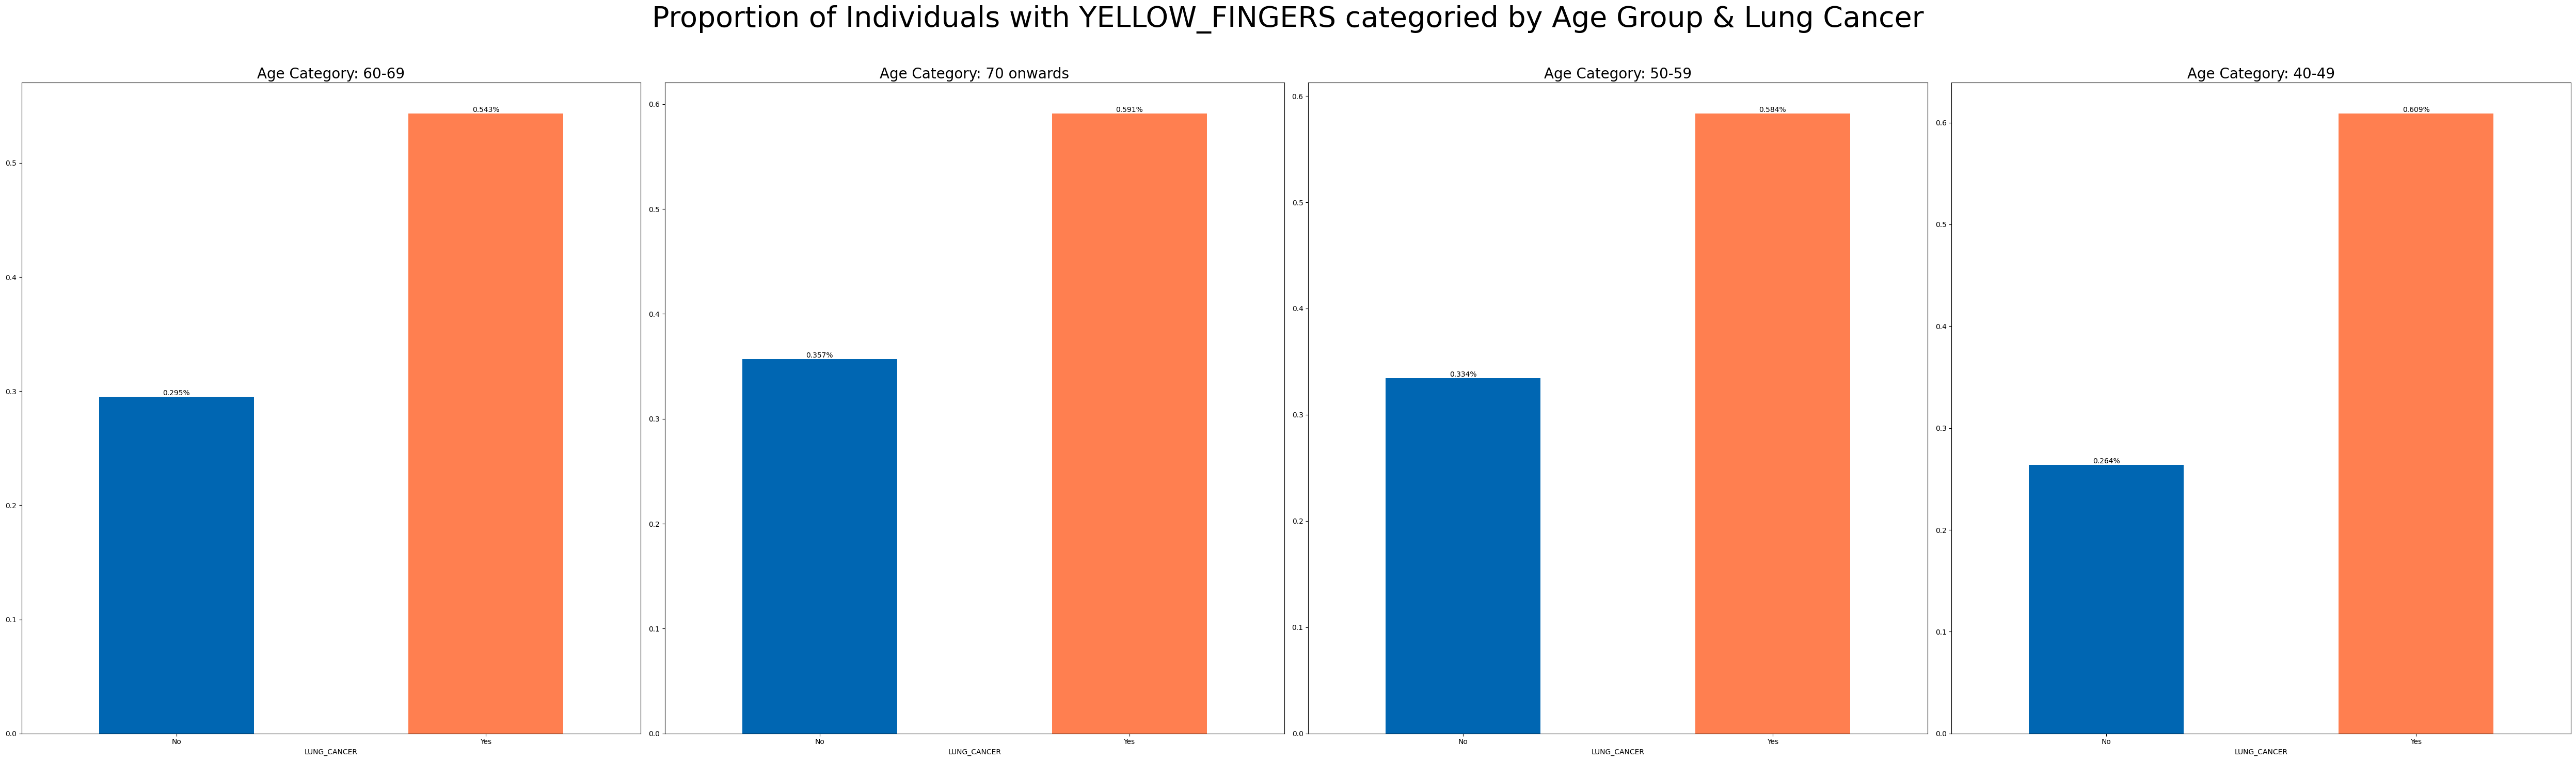

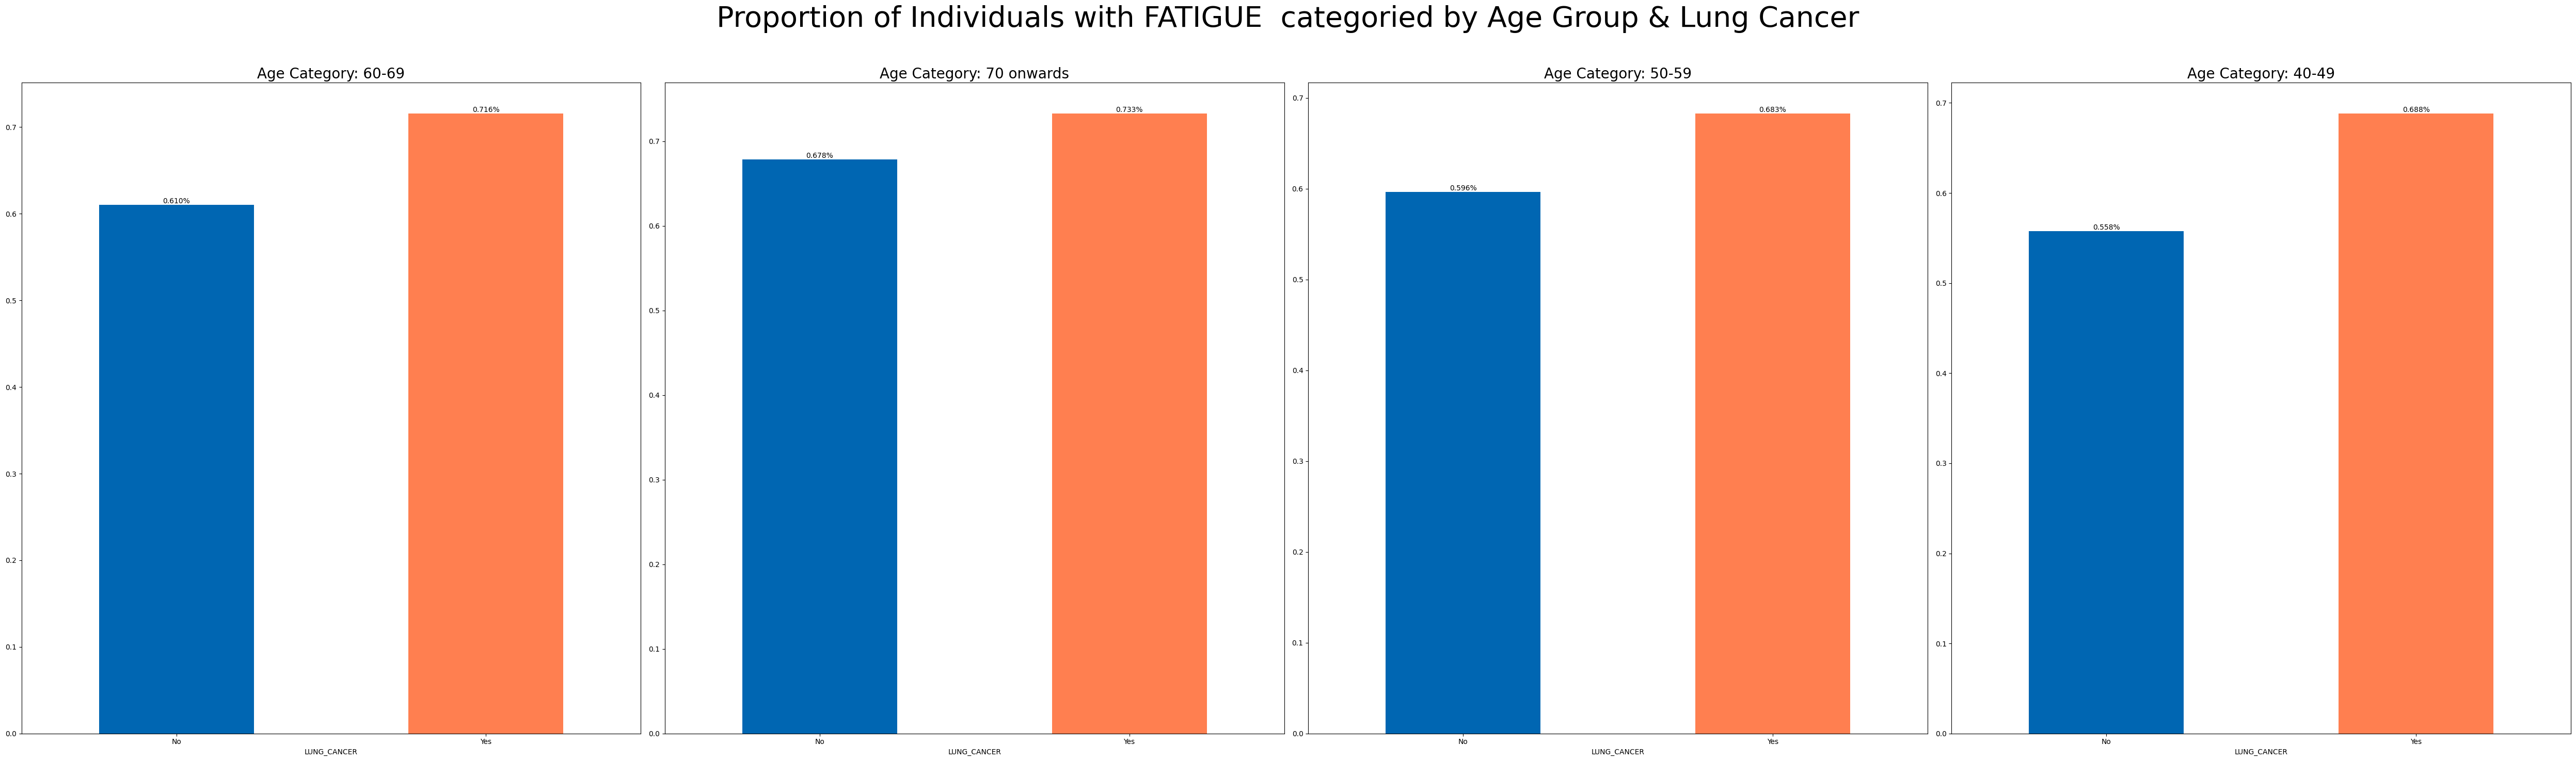

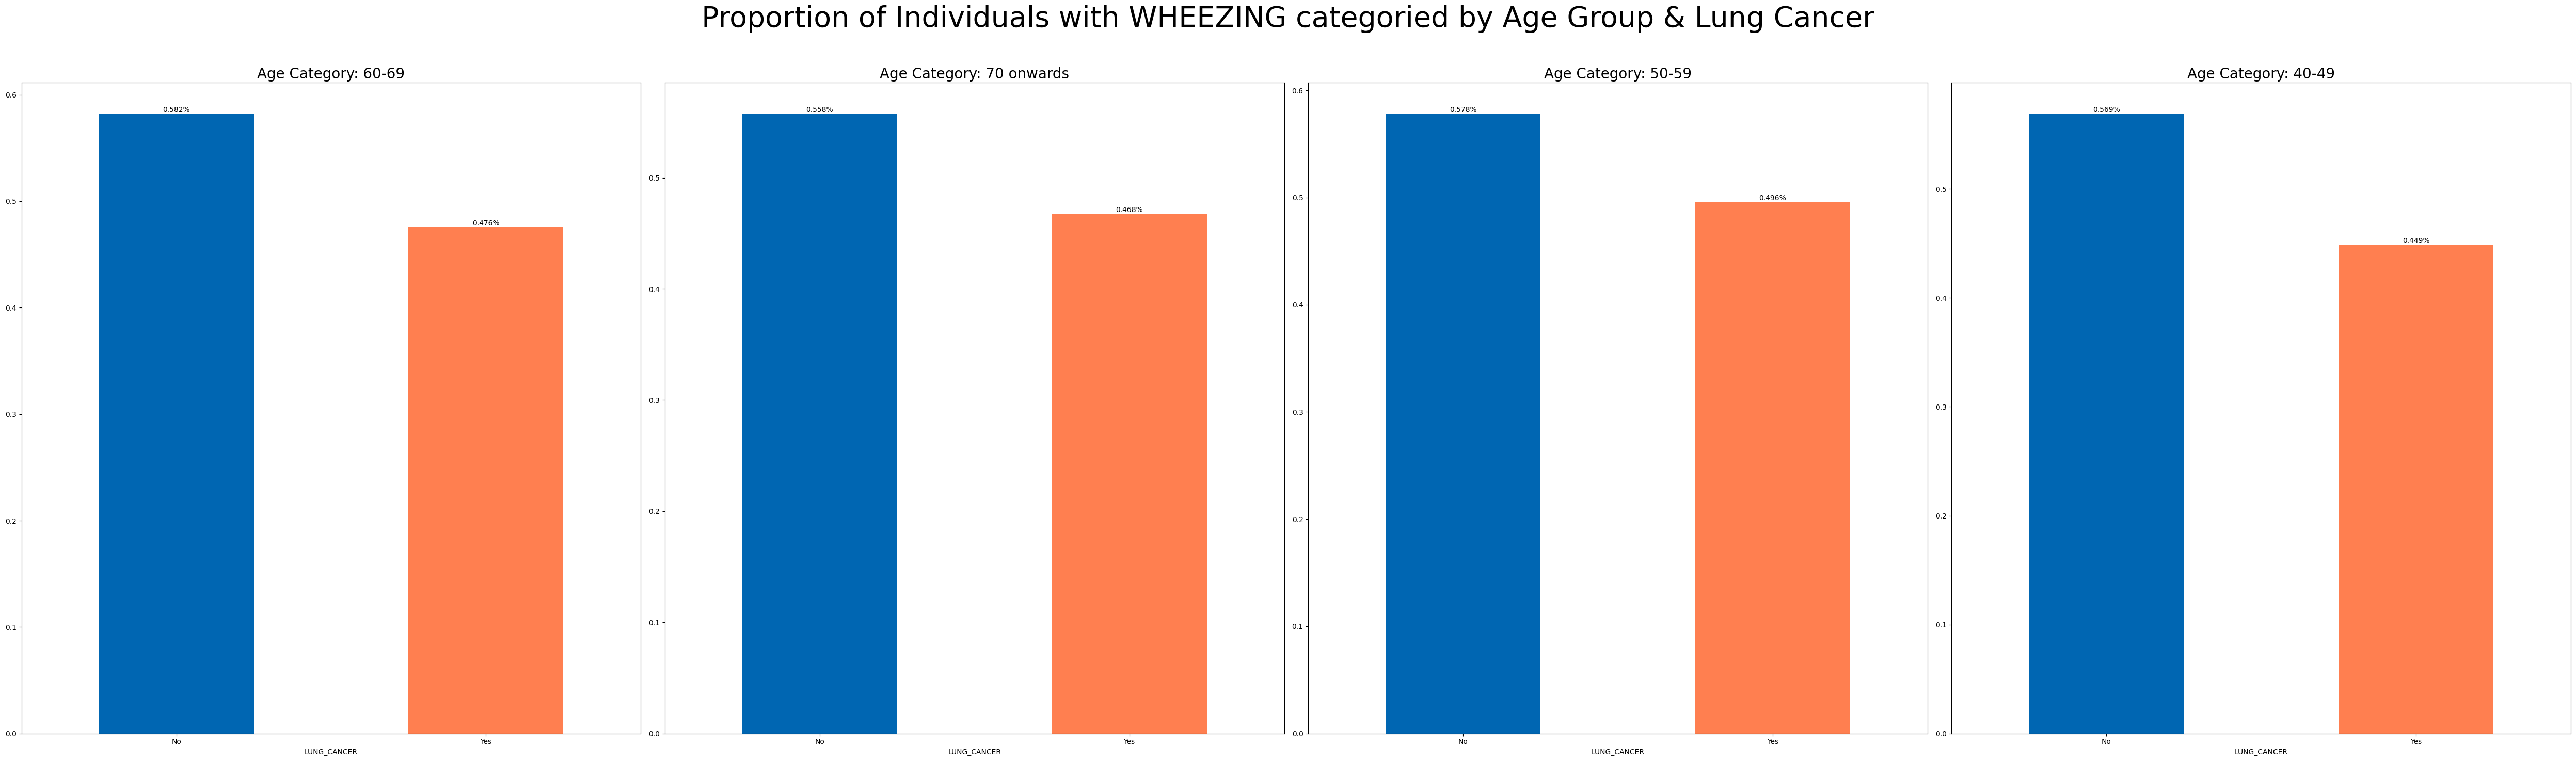

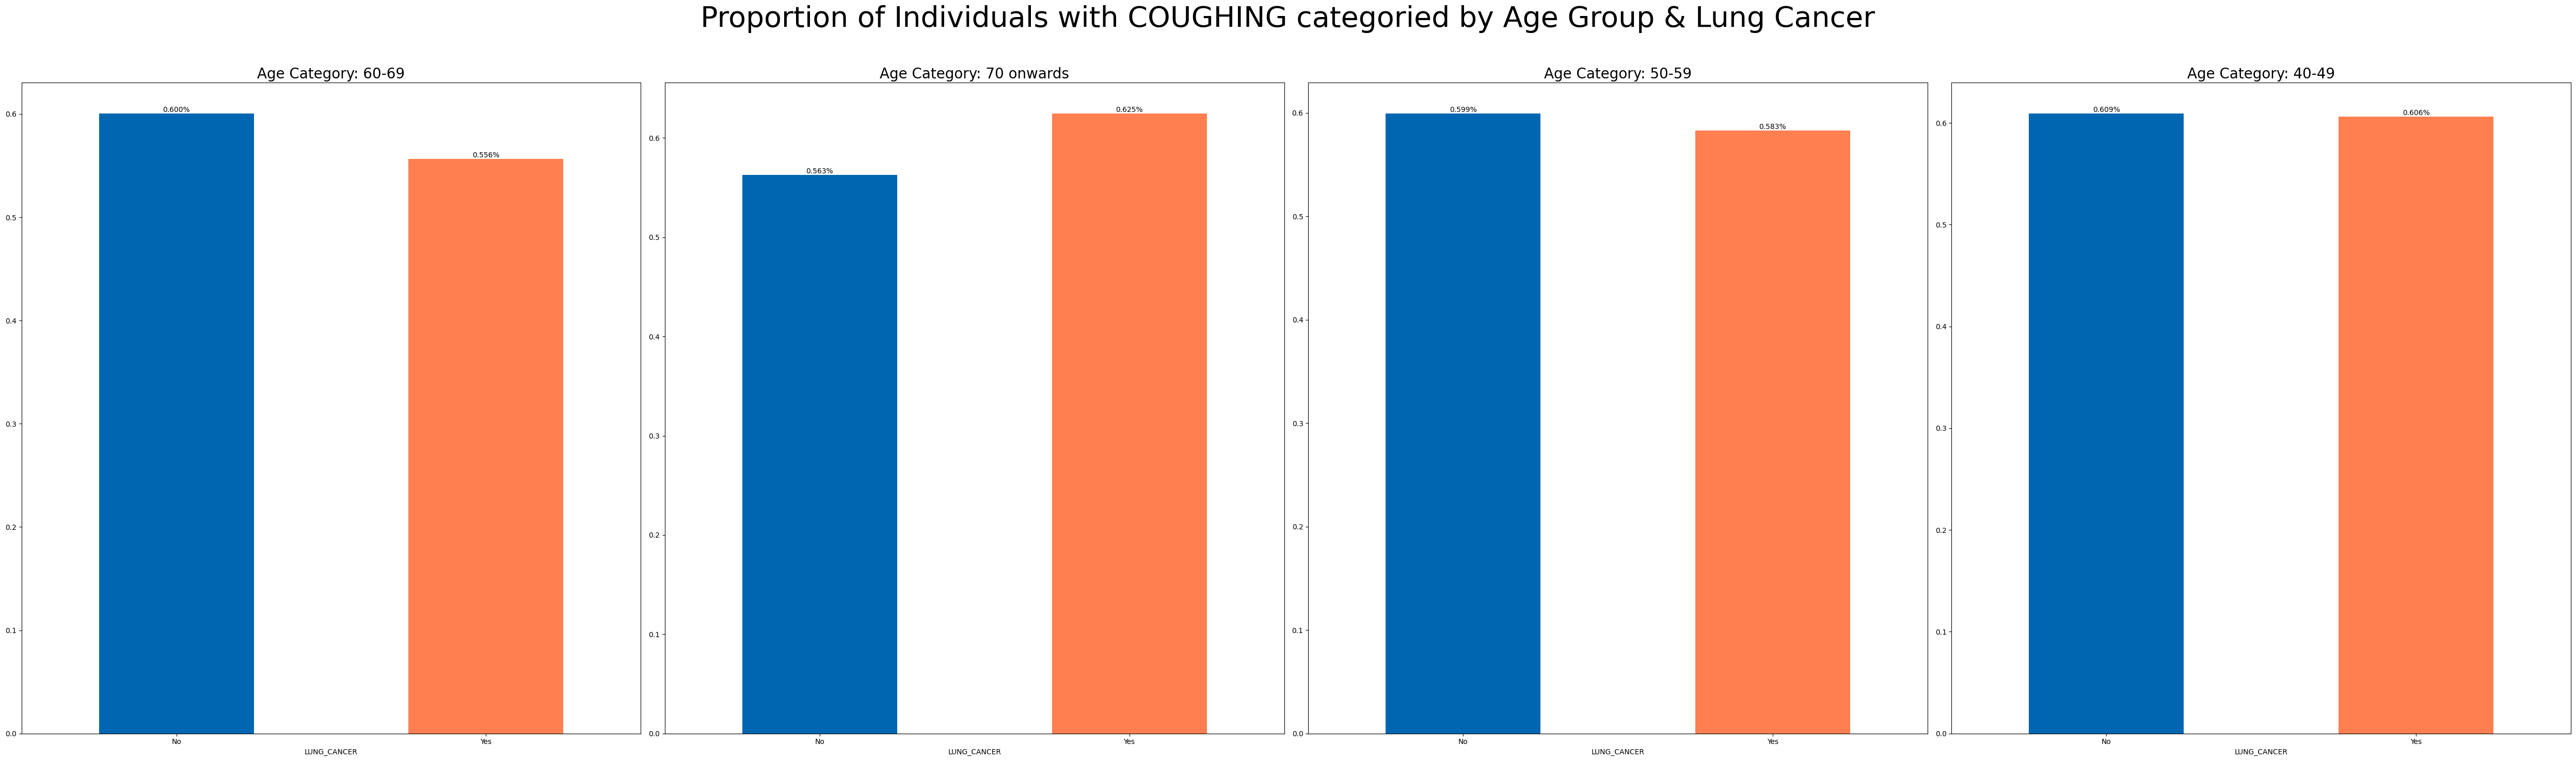

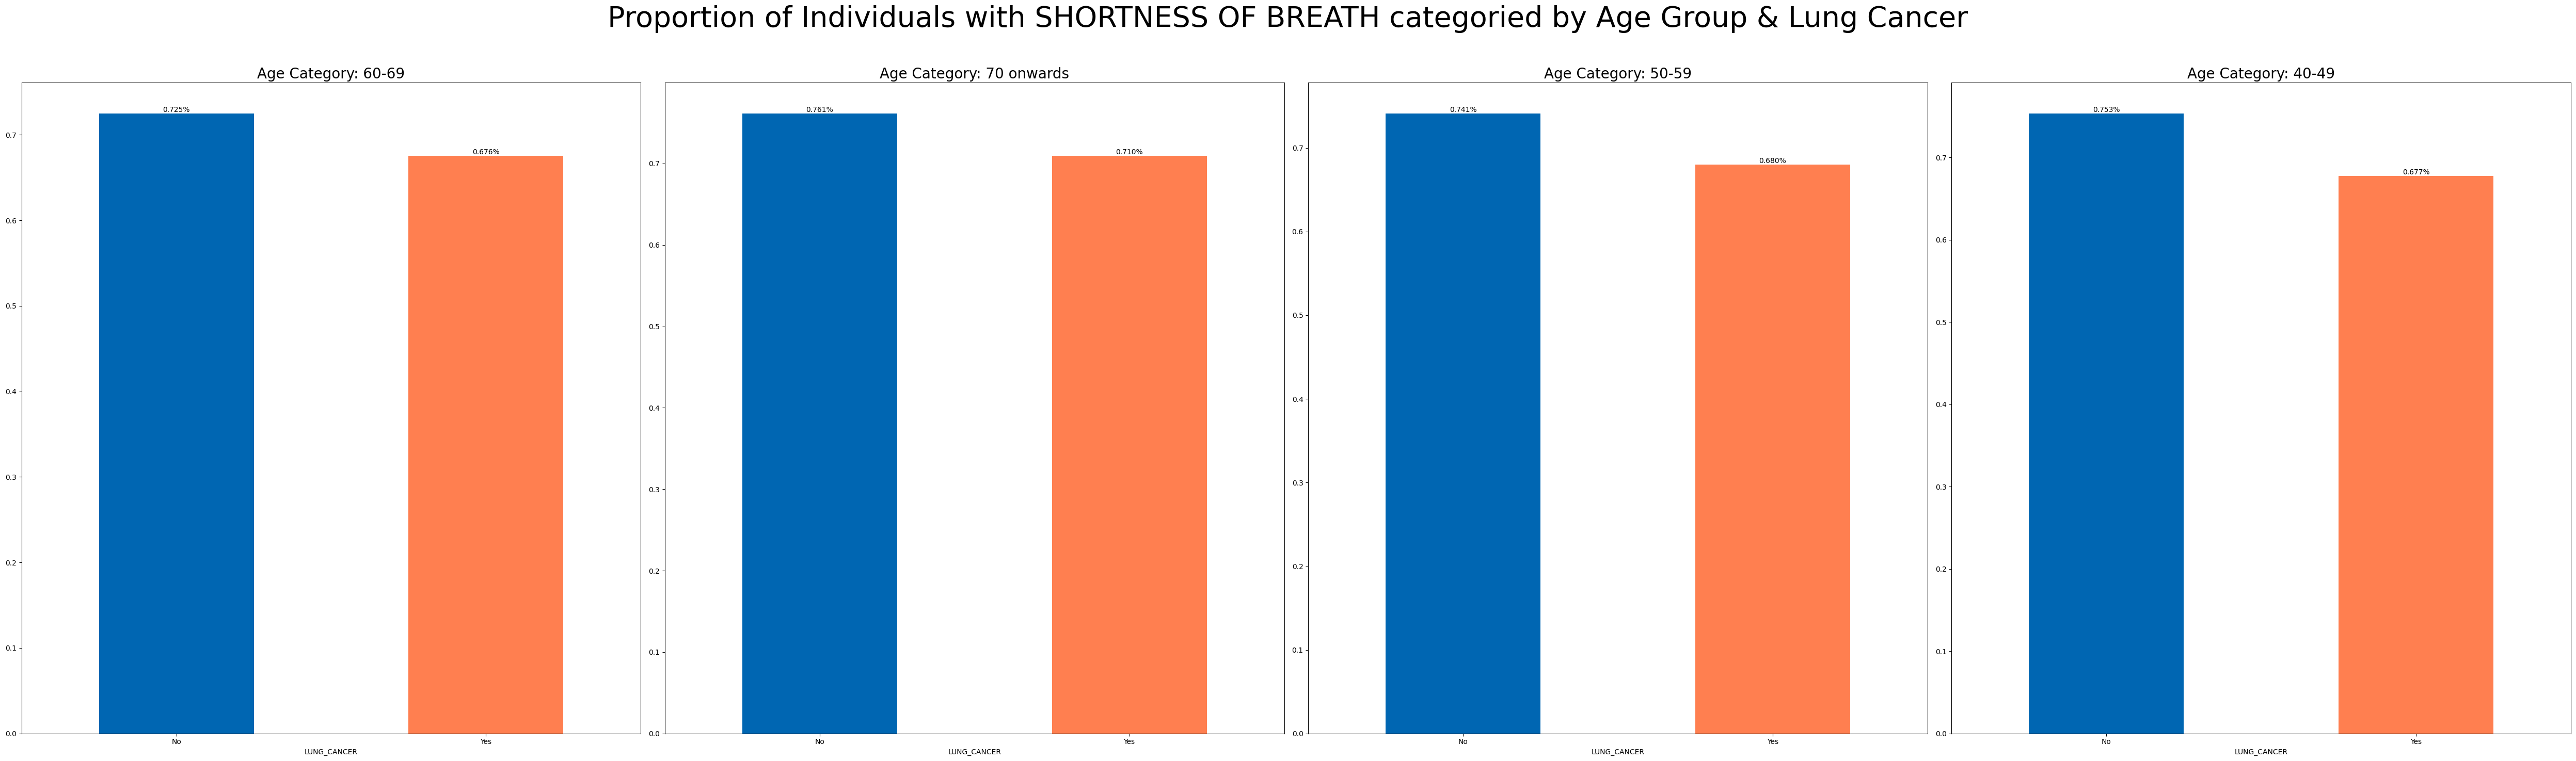

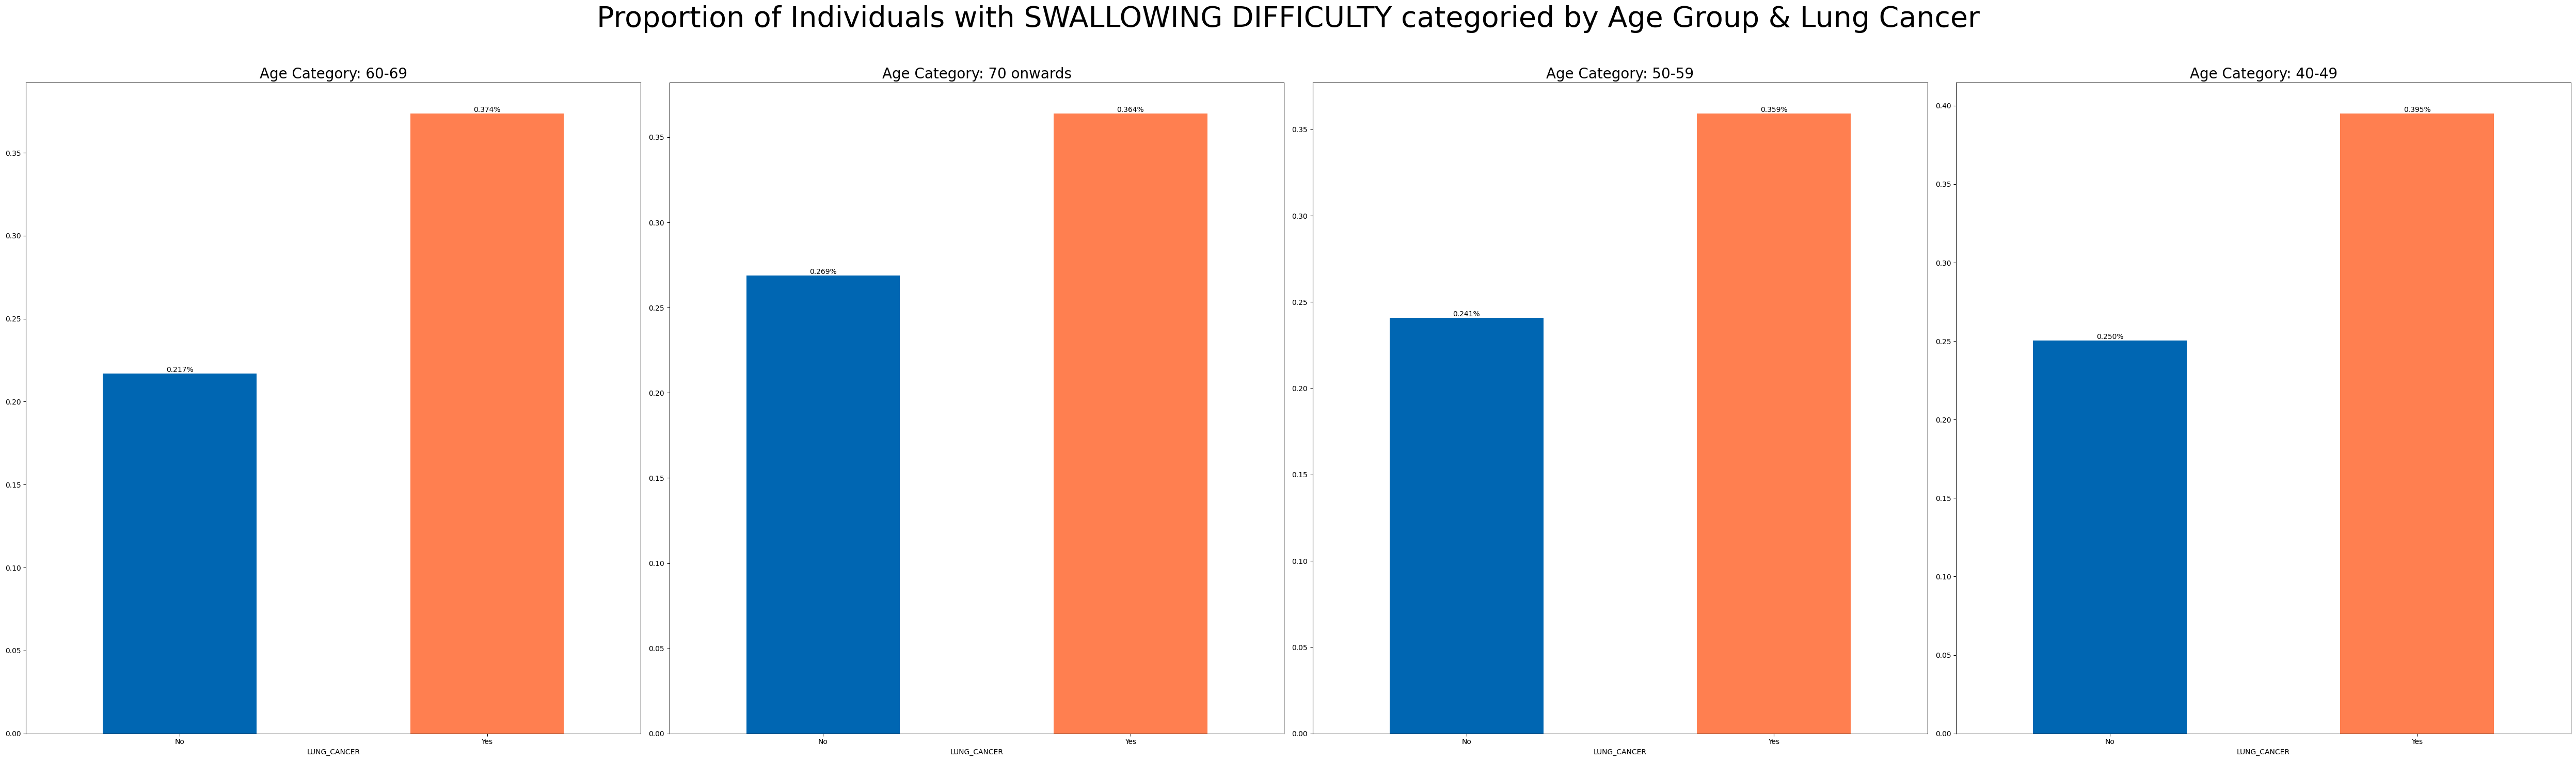

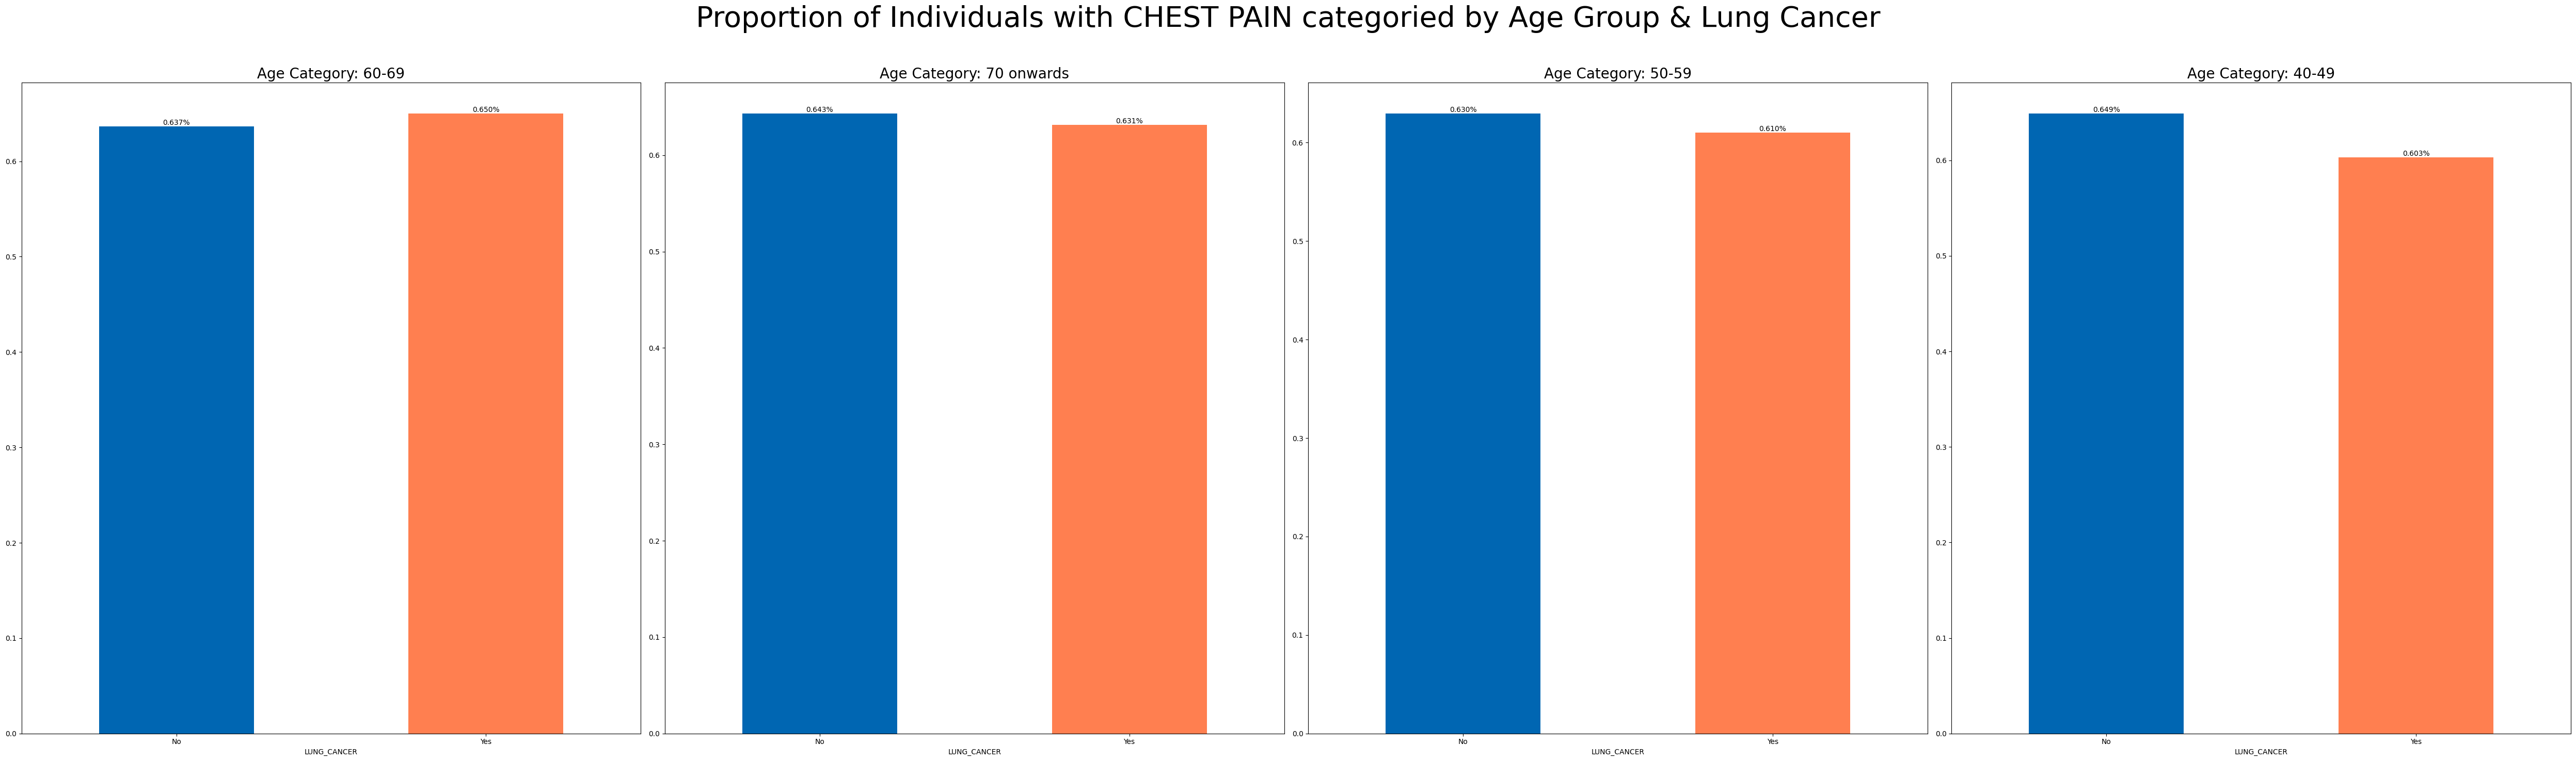

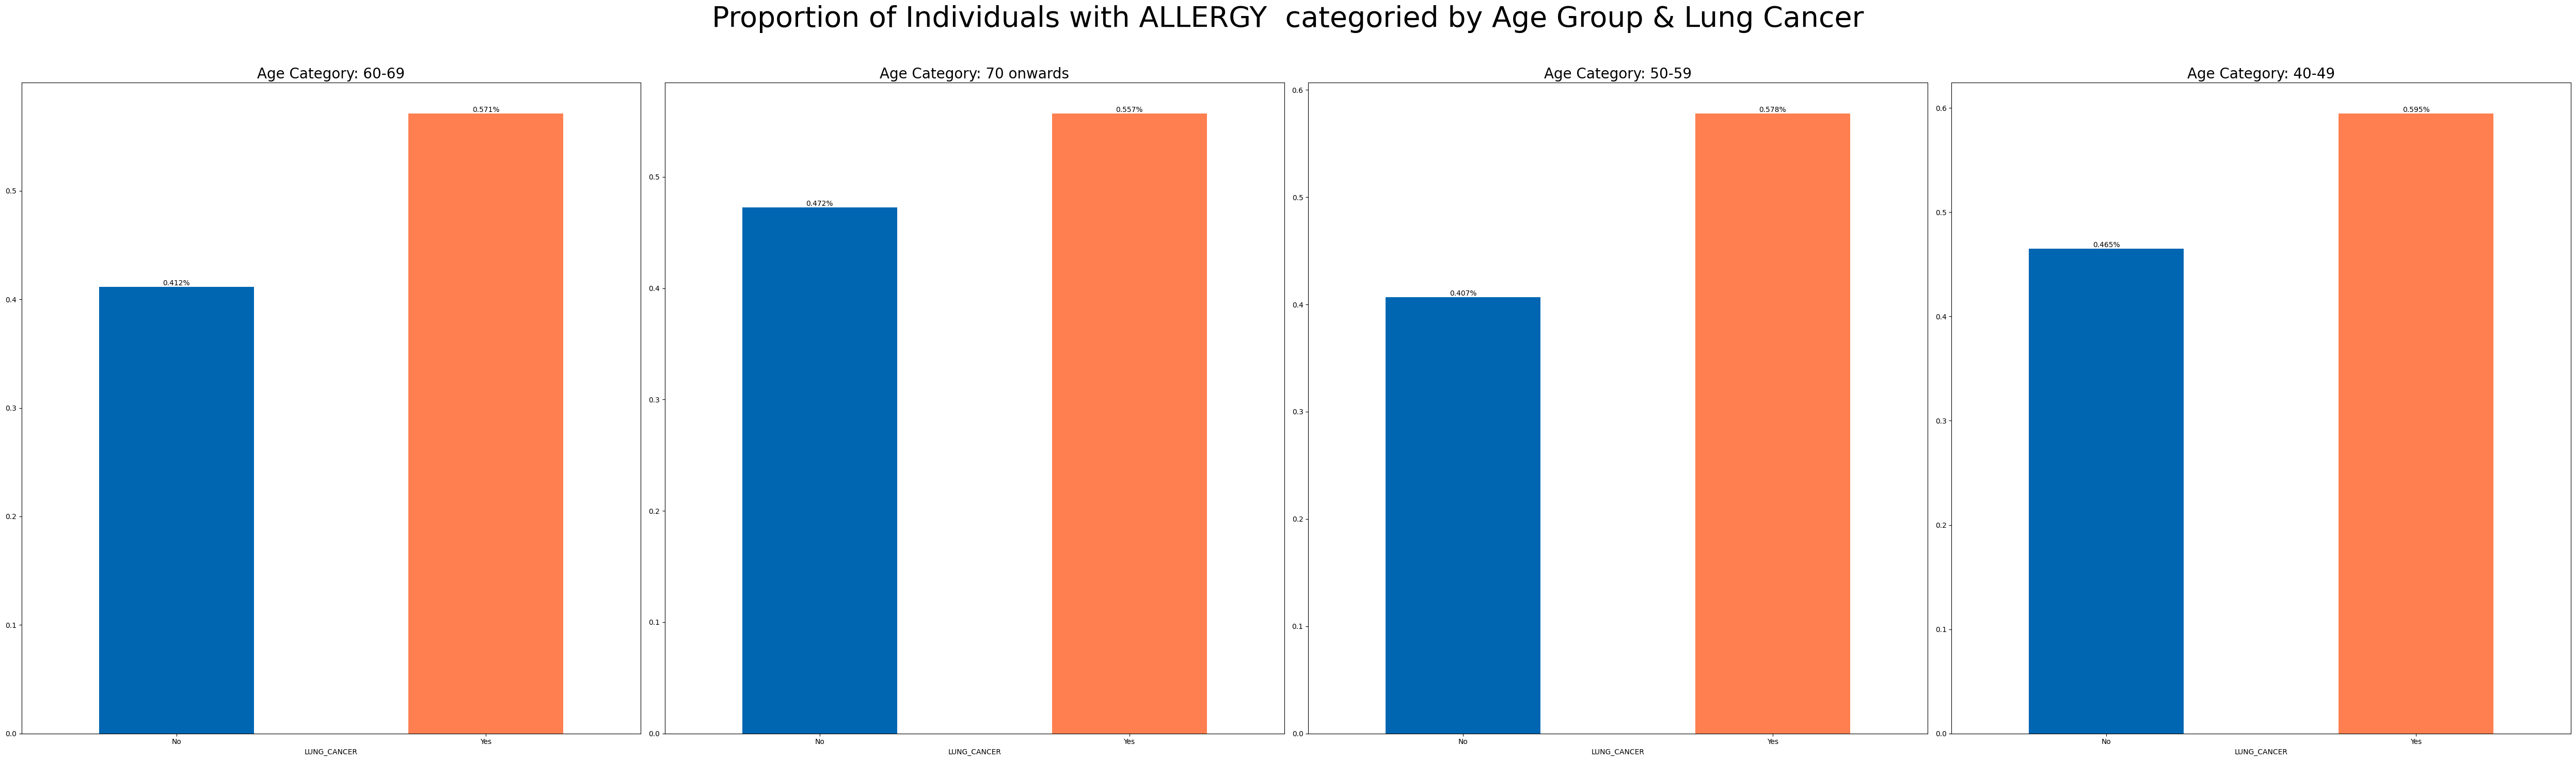

In [18]:
#Individual Symptoms Analysis by Age Category    
for e in symptoms:
    fig = plt.figure(figsize=(50, 15))
    count = 0
    for i in df['AGE_CATEGORY'].unique():
        sub_data = df[df['AGE_CATEGORY'] == i]
        cross = pd.crosstab(sub_data[e], sub_data['LUNG_CANCER']).apply(lambda r: r/r.sum(), axis=0)
        axs = fig.add_subplot(1, 4, count + 1)
        c = ['#0066b2', '#FF7F50']
        cross.iloc[1,:].T.plot(kind = 'bar', ax = axs, color = c)
        for bar in axs.patches:  # Accessing all bar patches directly
            height = bar.get_height()
            axs.annotate(f'{height:.3f}%', (bar.get_x() + bar.get_width() / 2, height), ha = "center", va = 'bottom')
        axs.set_xticks([0,1], ["No", "Yes"], rotation = 'horizontal')
        axs.set_title(f'Age Category: {i}', fontsize = 20)
        count += 1
    fig.suptitle(f'Proportion of Individuals with {e} categoried by Age Group & Lung Cancer', y = 0.98, fontsize = 40)    
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)